# Исследование объявлений о продаже квартир

### Изучение общей информации. 

In [1]:
import pandas as pd 

In [94]:
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep = '\t')
except:
    data = pd.read_csv('real_estate_data.csv',sep = '\t')
pd.set_option('display.max_columns',35)
data

total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0                2.70          16.0         51.0      8          NaN   False   
1                 NaN          11.0         18.6      1          NaN   False   
2                 NaN           5.0         34.3      4          NaN   False   
3                 NaN          14.0          NaN      9          NaN   False   
4                3.03          14.0         32.0     13          NaN   False   
...               ...           ...          ...    ...          ...     ...   
23694            3.70           5.0         73.3      3          NaN   False   
23695             NaN           5.0         38.0      4          NaN   False   
23696             NaN           3.0         29.7      1          NaN   False   
23697            3.00          17.0          NaN     12          NaN   False   
23698            2.50           5.0         12.3      1          NaN   False   

       open_plan  kitchen_area  balcony        locality_name  \
0          False         25.00      NaN      Санкт-Петербург   
1          False         11.00      2.0       посёлок Шушары   
2          False          8.30      0.0      Санкт-Петербург   
3          False           NaN      0.0      Санкт-Петербург   
4          False         41.00      NaN      Санкт-Петербург   
...          ...           ...      ...                  ...   
23694      False         13.83      NaN      Санкт-Петербург   
23695      False          8.50      NaN                Тосно   
23696      False           NaN      NaN     село Рождествено   
23697      False         23.30      2.0      Санкт-Петербург   
23698      False          9.00      NaN  поселок Новый Учхоз   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0               18863.0              16028.0               1.0          482.0   
1               12817.0              18603.0               0.0            NaN   
2               21741.0              13933.0               1.0           90.0   
3               28098.0               6800.0               2.0           84.0   
4               31856.0               8098.0               2.0          112.0   
...                 ...                  ...               ...            ...   
23694           24665.0               4232.0               1.0          796.0   
23695               NaN                  NaN               NaN            NaN   
23696               NaN                  NaN               NaN            NaN   
23697           39140.0              10364.0               2.0          173.0   
23698               NaN                  NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
0                   2.0          755.0              NaN  
1                   0.0            NaN             81.0  
2                   2.0          574.0            558.0  
3                   3.0          234.0            424.0  
4                   1.0           48.0            121.0  
...                 ...            ...              ...

In [3]:
len(data)

23699

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

сразу видим проблему с названием cityCenters_nearest

In [5]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'})
cl_data = data.copy()

In [6]:
cl_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

вывод: существует проблема с типами данных (числовые значения имеют тип string ) , существуют восполнимые пропуски в столбцах(ceiling_height,is_apartment,balcony) , но самые важные (площадь,стоимость,название населённого пункта(0,2% пропусков*)) не имеют пропусков
<br>явные дубликаты отсутствуют , неявные дубликаты присутсвуют в большом количестве в столбце locality_name
<br>странные значения были обнаружены в столбцах ceiling_height , требует дальнейшего изучения 

### Предобработка данных

In [7]:
cl_data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

проверка на выбросы количества комнат, есть квартиры с количеством комнат 0 , в остальном всё хорошо

In [8]:
translation_to_int = ['total_area','last_price','ceiling_height','living_area','kitchen_area','total_images','last_price','rooms','floors_total','floor','balcony','airports_nearest','city_centers_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest','days_exposition']
for item in translation_to_int:
    cl_data[item]=pd.to_numeric(cl_data[item],errors='raise')
cl_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

приводим часть столбцов к флоту 

In [9]:
cl_data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<br>у меня есть большие вопросы к минимальным и максимальным значения , но их отбросим чуть-чуть позже, пока займёмся пропусками (медиана выглядит вполне реалистична и подходит под госты , я предлагаю здесь Nan изменить под медиану)
<br>но опять же повторюсь чуть-чуть позже , пока просто наблюдаю и прощупываю 

In [10]:
cl_data[cl_data['locality_name'].isna()]

total_images  last_price  total_area first_day_exposition  rooms  \
1097              3   8600000.0       81.70  2016-04-15T00:00:00      3   
2033              6   5398000.0       80.00  2017-05-30T00:00:00      3   
2603             20   3351765.0       42.70  2015-09-20T00:00:00      1   
2632              2   5130593.0       62.40  2015-10-11T00:00:00      2   
3574             10   4200000.0       46.50  2016-05-28T00:00:00      2   
4151             17  17600000.0       89.50  2014-12-09T00:00:00      2   
4189              7   9200000.0       80.00  2015-12-10T00:00:00      3   
4670              1   5500000.0       83.00  2015-08-14T00:00:00      3   
5343             19  13540000.0       85.50  2016-01-20T00:00:00      3   
5707              7   3700000.0       30.00  2016-04-29T00:00:00      1   
6765             20   4895892.0       60.70  2015-03-12T00:00:00      2   
7114              5   4250000.0       56.00  2016-03-16T00:00:00      3   
7330              8   5100000.0       63.00  2015-01-27T00:00:00      3   
7600              8   6800000.0       70.00  2016-01-31T00:00:00      3   
8568             10  16000000.0      155.00  2016-05-09T00:00:00      3   
8986             10   4850000.0      103.10  2018-07-10T00:00:00      3   
9821             13   8000000.0       94.50  2015-01-21T00:00:00      4   
10122             5   8200000.0       83.00  2015-06-24T00:00:00      4   
11248            12   6300000.0       63.10  2015-01-16T00:00:00      4   
12879            12   4400000.0       39.20  2016-04-26T00:00:00      1   
12936             6   6800000.0       73.00  2015-11-01T00:00:00      3   
13223             1   2919911.0       29.40  2015-03-12T00:00:00      1   
13690             7   3500000.0       71.00  2016-06-23T00:00:00      3   
14273             2   4422000.0       60.00  2016-03-23T00:00:00      2   
14342             3   3611000.0       53.50  2017-04-27T00:00:00      1   
15686            13   4700000.0       44.00  2015-12-01T00:00:00      2   
15866            10   3950000.0       44.00  2016-04-16T00:00:00      2   
16499             2   4995573.0       56.90  2016-06-17T00:00:00      2   
16561             3   2450000.0       30.00  2016-06-02T00:00:00      1   
16610            11  11940000.0      112.00  2015-11-19T00:00:00      3   
17535             2   5985000.0       79.80  2018-07-30T00:00:00      3   
17764             9   8400000.0       94.00  2016-01-24T00:00:00      3   
18526             3  10800000.0       86.00  2016-06-24T00:00:00      4   
18917             3   2660000.0       37.99  2017-08-17T00:00:00      1   
19045             6   4650000.0       48.00  2016-01-25T00:00:00      2   
19972            20   4361004.0       62.40  2015-09-20T00:00:00      2   
20057            13  11500000.0      102.00  2015-10-14T00:00:00      2   
20382             8   1750000.0       72.90  2018-10-27T00:00:00      3   
20590             7   3380000.0       56.00  2017-11-06T00:00:00      2   
20654             7   6100000.0       43.00  2016-01-13T00:00:00      1   
21119             8   3500000.0       43.20  2018-11-11T00:00:00      2   
21276             0  17122148.0      178.30  2017-02-10T00:00:00      1   
21333            10   5900000.0       58.00  2015-03-12T00:00:00      3   
21715             2   6047550.0       80.10  2018-07-30T00:00:00      2   
21898             2   5886750.0       83.50  2018-07-30T00:00:00      2   
22474             7  24000000.0      128.00  2015-07-24T00:00:00      4   
22717             9   3000000.0       35.00  2018-01-02T00:00:00      1   
22933            20   3176015.0       33.30  2015-04-22T00:00:00      1   
23214             3   7990000.0       56.00  2016-05-31T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1097             3.55           5.0        50.80      2          NaN   False   
2033              NaN           4.0        42.60      2          NaN   False   
2603            

изучив карту Санкт-Петербурга я пришёл к выводу что минимальное рассторяние от центра до загородной части 15км  , следовательно все квартиры в радиусе 15км можно преписать к Питеру

In [11]:
cl_data.loc[(cl_data['locality_name'].isna())&(cl_data['city_centers_nearest']<=15000.0),'locality_name'] = 'Санкт-Петербург'
cl_data[cl_data['locality_name'].isna()]

total_images  last_price  total_area first_day_exposition  rooms  \
2033              6   5398000.0        80.0  2017-05-30T00:00:00      3   
2603             20   3351765.0        42.7  2015-09-20T00:00:00      1   
2632              2   5130593.0        62.4  2015-10-11T00:00:00      2   
5707              7   3700000.0        30.0  2016-04-29T00:00:00      1   
6765             20   4895892.0        60.7  2015-03-12T00:00:00      2   
8986             10   4850000.0       103.1  2018-07-10T00:00:00      3   
13223             1   2919911.0        29.4  2015-03-12T00:00:00      1   
13690             7   3500000.0        71.0  2016-06-23T00:00:00      3   
14273             2   4422000.0        60.0  2016-03-23T00:00:00      2   
14342             3   3611000.0        53.5  2017-04-27T00:00:00      1   
16499             2   4995573.0        56.9  2016-06-17T00:00:00      2   
17535             2   5985000.0        79.8  2018-07-30T00:00:00      3   
19972            20   4361004.0        62.4  2015-09-20T00:00:00      2   
20382             8   1750000.0        72.9  2018-10-27T00:00:00      3   
20590             7   3380000.0        56.0  2017-11-06T00:00:00      2   
21119             8   3500000.0        43.2  2018-11-11T00:00:00      2   
21276             0  17122148.0       178.3  2017-02-10T00:00:00      1   
21715             2   6047550.0        80.1  2018-07-30T00:00:00      2   
21898             2   5886750.0        83.5  2018-07-30T00:00:00      2   
22717             9   3000000.0        35.0  2018-01-02T00:00:00      1   
22933            20   3176015.0        33.3  2015-04-22T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
2033              NaN           4.0         42.6      2          NaN   False   
2603              NaN          24.0         15.6      3          NaN   False   
2632              NaN          24.0         33.1     21          NaN   False   
5707              NaN          24.0         20.0     23          NaN   False   
6765              NaN          24.0         31.9      3          NaN   False   
8986              NaN           NaN         68.1      4          NaN   False   
13223            2.75          24.0         21.1      2          NaN   False   
13690            2.75           2.0         45.6      1        False   False   
14273            2.75          23.0         32.0     14          NaN   False   
14342             NaN           4.0         25.8      3        False   False   
16499             NaN          24.0         29.2     14          NaN   False   
17535             NaN           9.0          NaN      2        False   False   
19972             NaN          24.0         33.1     21          NaN   False   
20382             NaN           5.0         47.3      2          NaN   False   
20590            2.70           4.0         29.0      3          NaN   False   
21119             NaN           4.0          NaN      2          NaN   False   
21276             NaN           3.0          NaN      1          NaN   False   
21715             NaN           9.0         30.5      2        False   False   
21898             NaN           9.0         36.6      2        False   False   
22717            2.60          16.0         16.0      7        False   False   
22933             NaN          23.0         15.4     22          NaN   False   

       open_plan  kitchen_area  balcony locality_name  airports_nearest  \
2033       False          18.6      0.0           NaN               NaN   
2603       False          10.7      0.0           NaN           22041.0   
2632       False           8.2      0.0           NaN           22041.0   
5707       False           NaN      0.0           NaN           21460.0   
6765       False          12.2      0.0           NaN           22041.0   
8986       False          16.7      NaN           NaN           19659.0   
13223      False           NaN      0.0           NaN           22041.

очень интресная картина,много строк имеет в airports_nearest значение 22041.0

In [12]:
cl_data[cl_data['airports_nearest']==22041.0]

total_images  last_price  total_area first_day_exposition  rooms  \
237               4   2438033.0        28.1  2016-11-23T00:00:00      1   
671               4   6051191.0        93.6  2017-04-06T00:00:00      3   
2603             20   3351765.0        42.7  2015-09-20T00:00:00      1   
2632              2   5130593.0        62.4  2015-10-11T00:00:00      2   
2846              4   2325000.0        27.8  2016-09-21T00:00:00      1   
4617              4   4275062.0        61.2  2017-04-27T00:00:00      2   
5784              4   4262941.0        59.9  2017-04-02T00:00:00      2   
6765             20   4895892.0        60.7  2015-03-12T00:00:00      2   
10013             4   4558637.0        64.4  2016-09-21T00:00:00      2   
10027             4   4650259.0        67.5  2017-04-01T00:00:00      2   
13223             1   2919911.0        29.4  2015-03-12T00:00:00      1   
13438             4   4403541.0        65.3  2016-09-21T00:00:00      2   
13955             4   5679678.0        87.3  2017-04-02T00:00:00      3   
14273             2   4422000.0        60.0  2016-03-23T00:00:00      2   
14717             4   6042477.0        89.4  2017-03-17T00:00:00      3   
16499             2   4995573.0        56.9  2016-06-17T00:00:00      2   
16850             4   6188957.0        90.2  2016-09-21T00:00:00      3   
17498             4   4252249.0        60.2  2017-04-01T00:00:00      2   
19972            20   4361004.0        62.4  2015-09-20T00:00:00      2   
22656             4   4574160.0        64.5  2017-04-02T00:00:00      2   
22933            20   3176015.0        33.3  2015-04-22T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
237               NaN           NaN        20.75      1          NaN   False   
671               NaN           NaN        47.10      8          NaN   False   
2603              NaN          24.0        15.60      3          NaN   False   
2632              NaN          24.0        33.10     21          NaN   False   
2846              NaN           NaN        19.40     15          NaN   False   
4617              NaN           NaN        32.00     12          NaN   False   
5784              NaN           NaN        31.70     18          NaN   False   
6765              NaN          24.0        31.90      3          NaN   False   
10013             NaN           NaN        31.70     19          NaN   False   
10027             NaN           NaN        31.30     20          NaN   False   
13223            2.75          24.0        21.10      2          NaN   False   
13438             NaN           NaN        31.60     11          NaN   False   
13955             NaN           NaN        50.40      5          NaN   False   
14273            2.75          23.0        32.00     14          NaN   False   
14717             NaN           NaN        50.00      6          NaN   False   
16499             NaN          24.0        29.20     14          NaN   False   
16850             NaN           NaN        47.70     14          NaN   False   
17498             NaN           NaN        31.80     13          NaN   False   
19972             NaN          24.0        33.10     21          NaN   False   
22656             NaN           NaN        31.70     20          NaN   False   
22933             NaN          23.0        15.40     22          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
237        False           NaN      0.0  Санкт-Петербург           22041.0   
671        False          16.8      0.0  Санкт-Петербург           22041.0   
2603       False          10.7      0.0              NaN           22041.0   
2632       False           8.2      0.0              NaN           22041.0   
2846       False           NaN      0.0  Санкт-Петербург           22041.0   
4617       False          12.2      0.0  Санкт-Петербург           22041.0   
5784       False          11.9      0.0  Санкт-Пе

здесь мы видим что ponds_nearest ponds_around3000 parks_around3000 city_centers_nearest cходиться следовательно можем сделать вывод что эти квартиры находятся в спб (в одном и томже месте)

In [13]:
cl_data.loc[(cl_data['locality_name'].isna())&(cl_data['airports_nearest']==22041.0),'locality_name'] = 'Санкт-Петербург'
cl_data[cl_data['locality_name'].isna()]

total_images  last_price  total_area first_day_exposition  rooms  \
2033              6   5398000.0        80.0  2017-05-30T00:00:00      3   
5707              7   3700000.0        30.0  2016-04-29T00:00:00      1   
8986             10   4850000.0       103.1  2018-07-10T00:00:00      3   
13690             7   3500000.0        71.0  2016-06-23T00:00:00      3   
14342             3   3611000.0        53.5  2017-04-27T00:00:00      1   
17535             2   5985000.0        79.8  2018-07-30T00:00:00      3   
20382             8   1750000.0        72.9  2018-10-27T00:00:00      3   
20590             7   3380000.0        56.0  2017-11-06T00:00:00      2   
21119             8   3500000.0        43.2  2018-11-11T00:00:00      2   
21276             0  17122148.0       178.3  2017-02-10T00:00:00      1   
21715             2   6047550.0        80.1  2018-07-30T00:00:00      2   
21898             2   5886750.0        83.5  2018-07-30T00:00:00      2   
22717             9   3000000.0        35.0  2018-01-02T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
2033              NaN           4.0         42.6      2          NaN   False   
5707              NaN          24.0         20.0     23          NaN   False   
8986              NaN           NaN         68.1      4          NaN   False   
13690            2.75           2.0         45.6      1        False   False   
14342             NaN           4.0         25.8      3        False   False   
17535             NaN           9.0          NaN      2        False   False   
20382             NaN           5.0         47.3      2          NaN   False   
20590            2.70           4.0         29.0      3          NaN   False   
21119             NaN           4.0          NaN      2          NaN   False   
21276             NaN           3.0          NaN      1          NaN   False   
21715             NaN           9.0         30.5      2        False   False   
21898             NaN           9.0         36.6      2        False   False   
22717            2.60          16.0         16.0      7        False   False   

       open_plan  kitchen_area  balcony locality_name  airports_nearest  \
2033       False          18.6      0.0           NaN               NaN   
5707       False           NaN      0.0           NaN           21460.0   
8986       False          16.7      NaN           NaN           19659.0   
13690      False           8.0      2.0           NaN           20234.0   
14342      False           NaN      1.0           NaN               NaN   
17535      False           NaN      NaN           NaN               NaN   
20382      False           8.3      NaN           NaN               NaN   
20590      False          10.0      1.0           NaN               NaN   
21119      False           NaN      NaN           NaN           19744.0   
21276      False          41.6      1.0           NaN           60195.0   
21715      False          29.2      NaN           NaN               NaN   
21898      False          29.7      NaN           NaN               NaN   
22717      False          10.0      1.0           NaN               NaN   

       city_centers_nearest  parks_around3000  parks_nearest  \
2033                    NaN               NaN            NaN   
5707                16788.0               0.0            NaN   
8986                31813.0               0.0            NaN   
13690               23659.0               0.0            NaN   
14342                   NaN               NaN            NaN   
17535                   NaN               NaN            NaN   
20382                   NaN               NaN            NaN   
20590                   NaN               NaN            NaN   
21119               31897.0               0.0            NaN   
21276               41294.0               0.0            NaN   
21715                   NaN               NaN            NaN   
21898           

In [14]:
cl_data.loc[(cl_data['locality_name'].isna())&(cl_data['airports_nearest']==21460.0),'locality_name'] = 'Санкт-Петербург'
cl_data[cl_data['locality_name'].isna()]

total_images  last_price  total_area first_day_exposition  rooms  \
2033              6   5398000.0        80.0  2017-05-30T00:00:00      3   
8986             10   4850000.0       103.1  2018-07-10T00:00:00      3   
13690             7   3500000.0        71.0  2016-06-23T00:00:00      3   
14342             3   3611000.0        53.5  2017-04-27T00:00:00      1   
17535             2   5985000.0        79.8  2018-07-30T00:00:00      3   
20382             8   1750000.0        72.9  2018-10-27T00:00:00      3   
20590             7   3380000.0        56.0  2017-11-06T00:00:00      2   
21119             8   3500000.0        43.2  2018-11-11T00:00:00      2   
21276             0  17122148.0       178.3  2017-02-10T00:00:00      1   
21715             2   6047550.0        80.1  2018-07-30T00:00:00      2   
21898             2   5886750.0        83.5  2018-07-30T00:00:00      2   
22717             9   3000000.0        35.0  2018-01-02T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
2033              NaN           4.0         42.6      2          NaN   False   
8986              NaN           NaN         68.1      4          NaN   False   
13690            2.75           2.0         45.6      1        False   False   
14342             NaN           4.0         25.8      3        False   False   
17535             NaN           9.0          NaN      2        False   False   
20382             NaN           5.0         47.3      2          NaN   False   
20590            2.70           4.0         29.0      3          NaN   False   
21119             NaN           4.0          NaN      2          NaN   False   
21276             NaN           3.0          NaN      1          NaN   False   
21715             NaN           9.0         30.5      2        False   False   
21898             NaN           9.0         36.6      2        False   False   
22717            2.60          16.0         16.0      7        False   False   

       open_plan  kitchen_area  balcony locality_name  airports_nearest  \
2033       False          18.6      0.0           NaN               NaN   
8986       False          16.7      NaN           NaN           19659.0   
13690      False           8.0      2.0           NaN           20234.0   
14342      False           NaN      1.0           NaN               NaN   
17535      False           NaN      NaN           NaN               NaN   
20382      False           8.3      NaN           NaN               NaN   
20590      False          10.0      1.0           NaN               NaN   
21119      False           NaN      NaN           NaN           19744.0   
21276      False          41.6      1.0           NaN           60195.0   
21715      False          29.2      NaN           NaN               NaN   
21898      False          29.7      NaN           NaN               NaN   
22717      False          10.0      1.0           NaN               NaN   

       city_centers_nearest  parks_around3000  parks_nearest  \
2033                    NaN               NaN            NaN   
8986                31813.0               0.0            NaN   
13690               23659.0               0.0            NaN   
14342                   NaN               NaN            NaN   
17535                   NaN               NaN            NaN   
20382                   NaN               NaN            NaN   
20590                   NaN               NaN            NaN   
21119               31897.0               0.0            NaN   
21276               41294.0               0.0            NaN   
21715                   NaN               NaN            NaN   
21898                   NaN               NaN            NaN   
22717                   NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
2033                NaN            NaN             34.0  
8986                0.0            NaN             28.0  
13690  

восстановить больше данные из этого столбца не представляется возможным , но тут есть другие полезные сведения , оставим пока эти объявления в cl_data 

In [15]:
cl_data.loc[cl_data['locality_name'].isna(),'locality_name'] = 'Область'

сделав проект могу сказать , что можно было бы по координатам восстановить (но вижу это только сейчас) поэтому всё что не имеет locality_name будет областью

In [16]:
cl_data['locality_name'].isna().sum()

0

полностью избавились от пропусков в локации , но отсутствие пропусков != корректным данным , под конец проекта мы это увидем 

In [17]:
cl_data['in_the_town'] = cl_data['locality_name']=='Санкт-Петербург'

In [18]:
cl_data.pivot_table(index = 'in_the_town',values = 'ceiling_height',aggfunc = ['mean','median','max','min','count'])

mean         median            max            min  \
            ceiling_height ceiling_height ceiling_height ceiling_height   
in_the_town                                                               
False             2.696587            2.6           32.0            1.2   
True              2.804004            2.7          100.0            1.0   

                     count  
            ceiling_height  
in_the_town                 
False                 4389  
True                 10115

здесь мы видим что за городом медианные показатели ниже, а также наличие выбросов 

In [19]:
data_ceiling_height = cl_data.pivot_table(index = ['airports_nearest','city_centers_nearest'],values = 'ceiling_height',aggfunc = 'median')

In [20]:
for t,p in data_ceiling_height.index :
        cl_data.loc[(data['ceiling_height'].isna()) & (cl_data['city_centers_nearest'] == p) & (cl_data['airports_nearest'] == t),'ceiling_height'] = \
        cl_data.loc[(data['airports_nearest'] == t) & (cl_data['city_centers_nearest'] == p),'ceiling_height'].median()

сейчас заполним координатным методом часть пропусков по высоте потолка (квартирыы могут быть выставлены в одном и том же доме => высота потолков в таких квартирах будет одинаковая,или же быть в микрорайоне с типичной застройкой , в любом случае это точнее медианы) 
<br> <b>примечание 1</b> данный метод может иметь неточности связанные с тем что по сути фиксированное расстояние можно представить как окружность , например кв находится на 10км от центра и мы можем построить окружность которая будет показывать все квартиры на этом расстояние от центра , и проделав тоже самое с аэропортом можно заметить ,что 2 окружности могут иметь 2 пересечения , тоесть квартиры с одинаковым расстояние от центра и аэропорта могут находиться далеко друг от друга. следовательно могут появляться недостоверные данные , для того чтобы всё работало корректно необходимо найти третью точку отсчёта , например лахта центр , в таком случае можно будет заполнить пропуски с большей точностью в некоторых столбцах
<br> <b>примечание 2</b>мне кажется это не оптимальный вариант решения данной задачи (обращение к индексам) , буду рад увидеть более произодительный метод 

In [21]:
print(cl_data['ceiling_height'].isna().sum())
cl_data
#data.loc[(data['ceiling_height'].isna()),'ceiling_height'] = data.loc[(data['airports_nearest']) & data['city_centers_nearest'] ,'ceiling_height'].median()
#data.pivot_table(index = 'in_the_town',values = 'ceiling_height',aggfunc = ['mean','median','max','min','count'])

5484


total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0                2.70          16.0         51.0      8          NaN   False   
1                 NaN          11.0         18.6      1          NaN   False   
2                 NaN           5.0         34.3      4          NaN   False   
3                3.00          14.0          NaN      9          NaN   False   
4                3.03          14.0         32.0     13          NaN   False   
...               ...           ...          ...    ...          ...     ...   
23694            3.70           5.0         73.3      3          NaN   False   
23695             NaN           5.0         38.0      4          NaN   False   
23696             NaN           3.0         29.7      1          NaN   False   
23697            3.00          17.0          NaN     12          NaN   False   
23698            2.50           5.0         12.3      1          NaN   False   

       open_plan  kitchen_area  balcony        locality_name  \
0          False         25.00      NaN      Санкт-Петербург   
1          False         11.00      2.0       посёлок Шушары   
2          False          8.30      0.0      Санкт-Петербург   
3          False           NaN      0.0      Санкт-Петербург   
4          False         41.00      NaN      Санкт-Петербург   
...          ...           ...      ...                  ...   
23694      False         13.83      NaN      Санкт-Петербург   
23695      False          8.50      NaN                Тосно   
23696      False           NaN      NaN     село Рождествено   
23697      False         23.30      2.0      Санкт-Петербург   
23698      False          9.00      NaN  поселок Новый Учхоз   

       airports_nearest  city_centers_nearest  parks_around3000  \
0               18863.0               16028.0               1.0   
1               12817.0               18603.0               0.0   
2               21741.0               13933.0               1.0   
3               28098.0                6800.0               2.0   
4               31856.0                8098.0               2.0   
...                 ...                   ...               ...   
23694           24665.0                4232.0               1.0   
23695               NaN                   NaN               NaN   
23696               NaN                   NaN               NaN   
23697           39140.0               10364.0               2.0   
23698               NaN                   NaN               NaN   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0              482.0               2.0          755.0              NaN   
1                NaN               0.0            NaN             81.0   
2               90.0               2.0          574.0            558.0   
3               84.0               3.0          234.0            424.0   
4              112.0               1.0           48.0            121.0   
...              ...               ...            ...              ...   
23694          796.0               3.0          381.0

In [22]:
cl_data.pivot_table(index = 'in_the_town',values = 'ceiling_height',aggfunc = ['mean','median','max','min','count'])

mean         median            max            min  \
            ceiling_height ceiling_height ceiling_height ceiling_height   
in_the_town                                                               
False             2.692430            2.6           32.0            1.2   
True              2.793746            2.7          100.0            1.0   

                     count  
            ceiling_height  
in_the_town                 
False                 4908  
True                 13307

остальные данные можно заполнить медианной за городом и вне , но сначало давайте посмотрим как наш метод повлиял на высоту потолков

<AxesSubplot:ylabel='Frequency'>

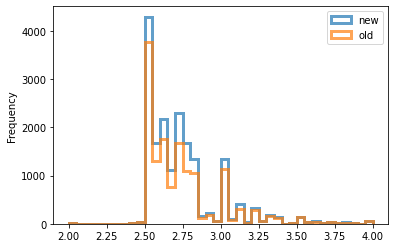

In [23]:
ax = cl_data['ceiling_height'].plot(kind = 'hist',y = 'ceiling_height',linewidth = 3,alpha = 0.7,label='new',grid = True,histtype = 'step',legend = True,bins = 40,range = (2,4))
data['ceiling_height'].plot(histtype = 'step',kind = 'hist',y = 'ceiling_height',linewidth = 3,alpha = 0.7,label='old',ax=ax,bins = 40,range = (2,4),legend = True)

очень даже не плохо, видно что значения равномерно расспределились 

In [24]:
for t in cl_data['in_the_town'].unique():
    cl_data.loc[(cl_data['in_the_town'] == t) & (cl_data['ceiling_height'].isna()), 'ceiling_height'] = \
    cl_data.loc[(cl_data['in_the_town'] == t), 'ceiling_height'].median()

<AxesSubplot:ylabel='Frequency'>

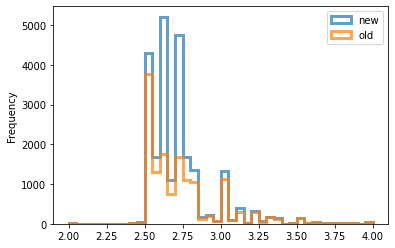

In [25]:
ax = cl_data['ceiling_height'].plot(kind = 'hist',y = 'ceiling_height',linewidth = 3,alpha = 0.7,label='new',grid = True,histtype = 'step',legend = True,bins = 40,range = (2,4))
data['ceiling_height'].plot(histtype = 'step',kind = 'hist',y = 'ceiling_height',linewidth = 3,alpha = 0.7,label='old',ax=ax,bins = 40,range = (2,4),legend = True)

вот теперь похоже на правду (по стандарту минимальная высота потолков 2.5м возможно в доме , но обычно высоту делают 2.6 - 2.7м , тоесть наше заполнение похоже на правду , единтсвенное что есть провал в районе 2.8-3.0м , мне кажется это связанно с тем что высота потолков в многоэтажках редко делаюь больше 2.8 , а в частных домах часто можно встретить высоту потолков 3.0-3.4 , тоесть провал и всплеск связан с тем что изменяется тип жилья 
                             

In [26]:
cl_data['ceiling_height'].describe()

count    23699.000000
mean         2.738273
std          1.025112
min          1.000000
25%          2.580000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

по данным особо изменений нет , но видим увеличение Q1 и уменьшение Q3

In [27]:
cl_data.loc[cl_data['is_apartment'].isna(),'is_apartment'] = False
cl_data.loc[cl_data['balcony'].isna(),'balcony'] = 0
cl_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
in_the_town                 0
dtype: int64

ну тут всё просто , если нет информации по балконам ,следовательно с высокой вероятностью балкона нет(нельзя говорить наверняка) 

In [28]:
cl_data['is_apartment'].unique()

array([False, True], dtype=object)

In [29]:
cl_data.pivot_table(index = 'locality_name',values = ['airports_nearest','city_centers_nearest'],aggfunc = ['mean','count'])

mean                                 count  \
                     airports_nearest city_centers_nearest airports_nearest   
locality_name                                                                 
Зеленогорск              73300.250000         54617.583333               24   
Колпино                  26375.863501         32113.771513              337   
Красное Село             26595.579545         30020.284091              176   
Кронштадт                67469.263158         49195.726316               95   
Ломоносов                48308.280303         50739.969697              132   
...                               ...                  ...              ...   
село Путилово                     NaN                  NaN                0   
село Рождествено                  NaN                  NaN                0   
село Русско-Высоцкое              NaN                  NaN                0   
село Старая Ладога                NaN                  NaN                0   
село Шум                          NaN                  NaN                0   

                                           
                     city_centers_nearest  
locality_name                              
Зеленогорск                            24  
Колпино                               337  
Красное Село                          176  
Кронштадт                              95  
Ломоносов                             132  
...                                   ...  
село Путилово                           0  
село Рождествено                        0  
село Русско-Высоцкое                    0  
село Старая Ладога                      0  
село Шум                                0  

[365 rows x 4 columns]

ага вижу проблему с данными ,возможно это связанно с дубликатами, потом повторим этот пункт  основная часть заполнения выполнена

а теперь работа с дубликатами/выбросами

In [30]:
cl_data.duplicated().sum()

0

это что нет полностью совпадающих объявлений , ну ладно , не больно то и хотелось

In [31]:
cl_data['last_price'].unique()

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

In [32]:
cl_data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

в квартиру за почти млрд поверить можно , ох уж эти элитки , а вот в квартиру за 23к вериться с трудом 

In [33]:
cl_data.sort_values('last_price').head()

total_images  last_price  total_area first_day_exposition  rooms  \
8793              7     12190.0       109.0  2019-03-20T00:00:00      2   
17456             7    430000.0        30.4  2019-04-22T00:00:00      1   
14911             5    430000.0        54.0  2018-06-26T00:00:00      2   
16274            18    440000.0        40.0  2018-07-10T00:00:00      1   
17676             0    450000.0        36.5  2018-02-01T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
8793             2.75          25.0         32.0     25        False   False   
17456            2.60           2.0         16.0      1        False   False   
14911            2.60           3.0          NaN      3        False   False   
16274            2.60           5.0          NaN      1        False   False   
17676            2.60           5.0         17.3      4        False   False   

       open_plan  kitchen_area  balcony          locality_name  \
8793       False          40.5      0.0        Санкт-Петербург   
17456      False           6.0      0.0                 Сланцы   
14911      False           NaN      0.0  посёлок станции Свирь   
16274      False           NaN      0.0     деревня Старополье   
17676      False           8.5      1.0      деревня Ям-Тесово   

       airports_nearest  city_centers_nearest  parks_around3000  \
8793            36421.0                9176.0               1.0   
17456               NaN                   NaN               NaN   
14911               NaN                   NaN               NaN   
16274               NaN                   NaN               NaN   
17676               NaN                   NaN               NaN   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
8793           805.0               0.0            NaN              8.0   
17456            NaN               NaN            NaN              NaN   
14911            NaN               NaN            NaN             44.0   
16274            NaN               NaN            NaN             45.0   
17676            NaN               NaN            NaN            120.0   

       in_the_town  
8793          True  
17456        False  
14911        False  
16274        False  
17676        False

попався , может 000 забыли)

In [34]:
cl_data = cl_data[cl_data.index != 8793]

пока пока квартира с индексом 8793

In [35]:
cl_data.sort_values('ceiling_height',ascending = False).head(30)

total_images  last_price  total_area first_day_exposition  rooms  \
22869             0  15000000.0       25.00  2018-07-25T00:00:00      1   
3148             14   2900000.0       75.00  2018-11-12T00:00:00      3   
22336            19   9999000.0       92.40  2019-04-05T00:00:00      2   
21377            19   4900000.0       42.00  2017-04-18T00:00:00      1   
21824            20   2450000.0       44.00  2019-02-12T00:00:00      2   
5807             17   8150000.0       80.00  2019-01-09T00:00:00      2   
4876              7   3000000.0       25.00  2017-09-27T00:00:00      0   
17857             1   3900000.0       56.00  2017-12-22T00:00:00      3   
22938            14   4000000.0       98.00  2018-03-15T00:00:00      4   
10773             8   3800000.0       58.00  2017-10-13T00:00:00      2   
5246              0   2500000.0       54.00  2017-10-13T00:00:00      2   
20478            11   8000000.0       45.00  2017-07-18T00:00:00      1   
9595             12  11500000.0       90.00  2018-02-14T00:00:00      3   
5669              4   4400000.0       50.00  2017-08-08T00:00:00      2   
14382             9   1700000.0       35.00  2015-12-04T00:00:00      1   
355              17   3600000.0       55.20  2018-07-12T00:00:00      2   
9379              5   3950000.0       42.00  2017-03-26T00:00:00      3   
6246              6   3300000.0       44.40  2019-03-25T00:00:00      2   
18545             6   3750000.0       43.00  2019-03-18T00:00:00      2   
4643              0   4300000.0       45.00  2018-02-01T00:00:00      2   
11285             0   1950000.0       37.00  2019-03-20T00:00:00      1   
5076              0   3850000.0       30.50  2018-10-03T00:00:00      1   
12247            10   7800000.0       75.61  2018-04-04T00:00:00      3   
20507            12   5950000.0       60.00  2018-02-19T00:00:00      2   
17496            15   6700000.0       92.90  2019-02-19T00:00:00      3   
21110            20   6690000.0       54.00  2018-09-10T00:00:00      2   
16114            16   6490000.0       57.00  2018-06-29T00:00:00      2   
4088             10   4500000.0       39.00  2018-04-02T00:00:00      1   
15061            19   5600000.0       56.40  2018-05-11T00:00:00      2   
18484             9   5500000.0       50.50  2018-02-26T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
22869         100.000           5.0        14.00      5         True   False   
3148           32.000           3.0        53.00      2        False   False   
22336          32.000           6.0        55.50      5        False   False   
21377          27.500          24.0        37.70     19        False   False   
21824          27.000           2.0        38.00      2        False   False   
5807           27.000          36.0        41.00     13        False   False   
4876           27.000          25.0        17.00     17        False   False   
17857          27.000           5.0        33.00      4        False   False   
22938          27.000           2.0        73.00      2         True   False   
10773          27.000          10.0        30.10      3        False   False   
5246           27.000           5.0        30.00      3        False   False   
20478          27.000           4.0        22.00      2        False   False   
9595           27.000           6.0          NaN      5        False   False   
5669           26.000           9.0        21.30      3        False   False   
14382          25.000           5.0        20.00      2        False   False   
355            25.000           5.0        32.00      2        False   False   
9379           25.000           5.0        30.00      2        False   False   
6246           25.000           5.0        31.30      5        False   False   
18545          25.000           5.0        29.00      3        False   False   
4643           25.000           9.0        30.00      2        False   False   
1

In [36]:
cl_data.loc[(cl_data['ceiling_height'] <= 32)&(cl_data['ceiling_height'] >= 24),'ceiling_height'] = cl_data['ceiling_height']/10

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [37]:
cl_data = cl_data.drop(labels =cl_data.loc[cl_data['ceiling_height'] > 5].index, axis = 0)

предположим кто-то забыл точкку , но вот квартиры с высотой потолка больше 5метров , неужели кто-то ангар продаёт...

In [38]:
cl_data.sort_values('ceiling_height',ascending = False).head(5)

total_images   last_price  total_area first_day_exposition  rooms  \
1053             13     550000.0        29.0  2018-02-01T00:00:00      1   
21923            10  115490000.0       235.0  2017-04-09T00:00:00      5   
2802              7   14950000.0        50.0  2016-03-06T00:00:00      2   
19142            10    8650000.0        87.7  2017-07-18T00:00:00      2   
1300             14  120000000.0       280.0  2018-07-12T00:00:00      5   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1053              5.0           3.0          NaN      1        False   False   
21923             4.9           5.0        140.0      5        False   False   
2802              4.8           3.0         30.0      2        False   False   
19142             4.7          26.0         57.4     26        False   False   
1300              4.7           4.0        162.0      3        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
1053       False           NaN      0.0     Бокситогорск               NaN   
21923      False          50.0      0.0  Санкт-Петербург           22777.0   
2802       False          10.0      0.0  Санкт-Петербург           24433.0   
19142      False          25.0      2.0  Санкт-Петербург           40648.0   
1300       False          30.0      0.0  Санкт-Петербург           24680.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
1053                    NaN               NaN            NaN   
21923                1328.0               3.0          652.0   
2802                 1725.0               1.0          589.0   
19142                9888.0               1.0         1248.0   
1300                 4247.0               1.0          464.0   

       ponds_around3000  ponds_nearest  days_exposition  in_the_town  
1053                NaN            NaN              6.0        False  
21923               3.0          253.0            351.0         True  
2802                3.0          161.0            160.0         True  
19142               0.0            NaN             15.0         True  
1300                3.0          339.0            225.0         True

In [39]:
cl_data['living_area'].describe()

count    21775.000000
mean        34.440277
std         21.980030
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

2 квадрата хм , азиатские тренды до нас добрались

In [40]:
cl_data.sort_values('living_area').head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
13915            20   6350000.0        52.0  2018-02-06T00:00:00      2   
21758             0   2330000.0        23.0  2018-01-01T00:00:00      0   
3242              7   4440000.0        41.0  2017-07-02T00:00:00      1   
23574            14  64990000.0       139.0  2015-11-24T00:00:00      3   
17582            11   2680000.0        22.0  2018-08-11T00:00:00      0   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
13915           3.000           6.0          2.0      2        False   False   
21758           2.600          24.0          2.0     22        False    True   
3242            2.740          17.0          3.0     17        False   False   
23574           3.000           8.0          3.0      8        False   False   
17582           2.685          25.0          5.0      8        False    True   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
13915      False           9.0      0.0  Санкт-Петербург           32453.0   
21758      False           NaN      0.0   посёлок Мурино               NaN   
3242       False          11.0      0.0  Санкт-Петербург           19272.0   
23574      False          16.0      1.0  Санкт-Петербург           33255.0   
17582      False           NaN      2.0  Санкт-Петербург           22735.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
13915                6521.0               0.0            NaN   
21758                   NaN               NaN            NaN   
3242                13073.0               0.0            NaN   
23574                5975.0               1.0          630.0   
17582               11618.0               1.0          835.0   

       ponds_around3000  ponds_nearest  days_exposition  in_the_town  
13915               1.0         1012.0             91.0         True  
21758               NaN            NaN             66.0        False  
3242                0.0            NaN            216.0         True  
23574               3.0          100.0            280.0         True  
17582               1.0          652.0             70.0         True

два квадрата - две комнаты

In [41]:
cl_data = cl_data.drop(labels =cl_data.loc[cl_data['living_area'] < 5].index, axis = 0)

готов поверить если кто-то продаёт комнату 5+ м 

In [42]:
cl_data['kitchen_area'].describe()

count    21400.000000
mean        10.564697
std          5.891710
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

кухня 1.3 не знаю что сказать , но может быть в студии обозначили кухонную зону 

In [43]:
len(cl_data['locality_name'].unique())

365

365 , посмотрим что под капотом 

In [44]:
cl_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

сколько повторов ужас,ещё хуже то что я сделаю , но это не важно 
<br> предлагаю тип поселения переместить в новый столбик и привести всё к нижнему регистру 

In [45]:
def categorize_purpose(row):
    row['locality_name'] = row['locality_name'].lower()
    if row['locality_name'].find('поселок')!= -1:
        row['locality_name'] = row['locality_name'].replace('поселок','посёлок')
        row['type_of_locality'] = 'посёлок'
    if row['locality_name'].find('городской посёлок')!= -1:
        row['locality_name'] = row['locality_name'].replace('городской посёлок ','')
        row['type_of_locality'] = 'посёлок'
    if row['locality_name'].find('посёлок городского типа')!= -1:
        row['locality_name'] = row['locality_name'].replace('посёлок городского типа ','')
        row['type_of_locality'] = 'посёлок'
    if row['locality_name'].find('деревня')!= -1:
        row['locality_name'] = row['locality_name'].replace('деревня ','')
        row['type_of_locality'] = 'деревня'
    if row['locality_name'].find('коттеджный посёлок')!= -1:
        row['locality_name'] = row['locality_name'].replace('коттеджный посёлок ','')
        row['type_of_locality'] = 'посёлок'
    if row['locality_name'].find('посёлок ')!= -1:
        row['locality_name'] = row['locality_name'].replace('посёлок ','')
        row['type_of_locality'] = 'посёлок'
    if row['locality_name'].find('село ')!= -1:
        row['locality_name'] = row['locality_name'].replace('село ','')
        row['type_of_locality'] = 'посёлок'
    if row['locality_name'].find('садоводческое некоммерческое товарищество ')!= -1:
        row['locality_name'] = row['locality_name'].replace('садоводческое некоммерческое товарищество ','')
        row['type_of_locality'] = 'посёлок'
    if row['locality_name'].find('при железнодорожной ')!= -1:
        row['locality_name'] = row['locality_name'].replace('при железнодорожной ','') 
        row['type_of_locality'] = 'посёлок'
    if row['locality_name'].find('садовое товарищество ')!= -1:
        row['locality_name'] = row['locality_name'].replace('садовое товарищество ','') 
        row['type_of_locality'] = 'посёлок'
    if row['locality_name'].find('станции ')!= -1:
        row['locality_name'] = row['locality_name'].replace('станции ','')
        row['type_of_locality'] = 'посёлок'
    if row['locality_name'].find('кудров')!= -1:
        row['locality_name'] = 'кудрово'
        row['type_of_locality'] = 'человечник'
    if row['locality_name'].find('мурин')!= -1:
        row['locality_name'] = 'мурино'
        row['type_of_locality'] = 'человечник'
    if row['locality_name'].find('санкт-петербург')!= -1:
        row['type_of_locality'] = 'город'
    if row['locality_name'].find('всеволожск')!= -1 or row['locality_name'].find('пушкин')!= -1 or row['locality_name'].find('колпино')!= -1 or row['locality_name'].find('гатчина')!= -1 or row['locality_name'].find('выборг')!= -1 or row['locality_name'].find('петергоф')!= -1:
        row['type_of_locality'] = 'областной город'
    if row['type_of_locality'] != 'город' and row['type_of_locality'] != 'областной город' and row['type_of_locality'] != 'человечник' and row['type_of_locality'] != 'посёлок' and row['type_of_locality'] != 'деревня':
        row['type_of_locality'] = 'посёлок'
    return row

я знаю что нарушил один из принципов программирования , а именно повтор кода , тут можно сделать всё куда лаконичнее , но к сожалению после больницы пока не в ресурсе (весь код кроме 5 пункта писал до) 

In [46]:
cl_data['type_of_locality'] = cl_data['locality_name']
cl_data = cl_data.apply(categorize_purpose, axis=1)

как можно создать пустой столбик без такого костыля ? 

In [47]:
print(len(cl_data['locality_name'].unique()))
cl_data['locality_name'].sort_values().unique()

306


array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'вещево',
       'виллози', 'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпосёлок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'извара'

сапёрное и сапёрный разные лол, а в целом 306 , вроде бы все повторы убрали 

In [48]:
cl_data['type_of_locality'].value_counts()

город              15734
посёлок             4382
областной город     1850
человечник          1061
деревня              645
Name: type_of_locality, dtype: int64

<b>примечание</b> я отметил только самые крупные областные города , это не совсем корректно 

In [49]:
cl_data.value_counts('in_the_town')

in_the_town
True     15734
False     7938
dtype: int64

вроде не потеряли данные и не исказили 

In [50]:
#for t in cl_data['locality_name'].unique():
#    cl_data.loc[(cl_data['locality_name'] == t) & (t != 'санкт-петербург') & (cl_data['airports_nearest'].isna()), 'airports_nearest'] = \
#    cl_data.loc[(cl_data['locality_name'] == t), 'airports_nearest'].median()
#    cl_data.loc[(cl_data['locality_name'] == t) & (t != 'санкт-петербург') & (cl_data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
#    cl_data.loc[(cl_data['locality_name'] == t), 'city_centers_nearest'].median()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>объясню идею , я считаю в данном случае так делать корректно , я пытаюсь получить примерное расстояние от центра , я не трогаю спб из-а того что в нём слишком большой разброс , а в остальных пунктах разброс значений небольшой(посёлок не привышает км как правило), но в дальнейшем мы можем построить диаграмму стоимости от центра города и у нас будет больше значений с небольшой погрешностью в расстоянии (например у нас дом может находиться на расстоянии 30664м от центра ,но путём заполнения получиться 30445м , но цена на 30км и 31 не будет особо отличаться )
<br>но возможно я не прав , хотелось бы получить комментарий почему так делать не корректно
</div>

если мы не в спб , спокойно можно расстояние до центра и аэропорта заполнить медианными значениями населённых пунктов , так как они не большие и данной точности нам хватит 

In [51]:
cl_data[cl_data['airports_nearest'].isna()]
cl_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1901
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2272
balcony                     0
locality_name               0
airports_nearest         5540
city_centers_nearest     5517
parks_around3000         5516
parks_nearest           15605
ponds_around3000         5516
ponds_nearest           14574
days_exposition          3178
in_the_town                 0
type_of_locality            0
dtype: int64

впринципе предобработка закончена , перед началом обработки давайте поищем несостыковки в данных 

In [52]:
print(len(cl_data.loc[cl_data['total_area'] < cl_data['kitchen_area']+cl_data['living_area']]))
cl_data.loc[cl_data['total_area'] < cl_data['kitchen_area']+cl_data['living_area']]

64


total_images  last_price  total_area first_day_exposition  rooms  \
184               7   2600000.0       30.20  2018-02-14T00:00:00      1   
545               9   4700000.0       23.80  2018-12-28T00:00:00      1   
551               8   3100000.0       31.59  2018-03-08T00:00:00      1   
601              12   5600000.0       53.70  2017-04-18T00:00:00      2   
696               1   3364930.0       34.69  2014-11-27T00:00:00      1   
...             ...         ...         ...                  ...    ...   
21824            20   2450000.0       44.00  2019-02-12T00:00:00      2   
21868            12   2600000.0       34.30  2018-09-26T00:00:00      1   
21915            14  11990000.0       91.40  2016-05-16T00:00:00      2   
21956             0   5200000.0       46.00  2018-07-20T00:00:00      2   
23202            13   4919880.0       67.92  2018-10-23T00:00:00      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
184              2.65           9.0        26.10      5         False   False   
545              2.75          18.0        20.00      9         False   False   
551              2.70          19.0        30.55      2         False   False   
601              2.50          12.0        48.30      5         False   False   
696              2.64          25.0        23.43     25         False   False   
...               ...           ...          ...    ...           ...     ...   
21824            2.70           2.0        38.00      2         False   False   
21868            2.50           9.0        30.60      6         False   False   
21915            2.75          16.0        62.00     12         False   False   
21956            2.70           5.0        44.00      5         False   False   
23202            2.60           3.0        63.00      3         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
184        False          6.20      0.0  санкт-петербург           13952.0   
545        False          5.00      0.0  санкт-петербург            9731.0   
551        False          9.28      2.0           мурино               NaN   
601        False          7.00      2.0  санкт-петербург           50477.0   
696        False         23.43      2.0  санкт-петербург           43396.0   
...          ...           ...      ...              ...               ...   
21824      False          8.60      2.0    большая ижора               NaN   
21868      False          8.00      2.0     сосновый бор               NaN   
21915      False         32.40      0.0  санкт-петербург           10934.0   
21956      False          8.00      1.0  санкт-петербург           14103.0   
23202      False         13.04      0.0       всеволожск               NaN   

       city_centers_nearest  parks_around3000  parks_nearest  \
184                 15031.0               0.0            NaN   
545                 11849.0               0.0            NaN   
551                     NaN               NaN            NaN   
601                 13252.0               2.0          220.0   
696                 12153.0               0.0            NaN   
...                     ...               ...            ...   
21824                   NaN               NaN            NaN   
21868                   NaN               NaN            NaN   
21915               12551.0               0.0            NaN   
21956               15182.0               1.0          488.0   
23202                   NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition  in_the_town  \
184                 1.0          824.0             12.0         True   
545                 0.0            NaN            108.0         True   
551                 NaN            NaN             70.0        False   
601                 1.0         1250.0            167.0         True   
696                 0.0            NaN            574.0         Tru

In [53]:
cl_data = cl_data.drop(labels =cl_data.loc[cl_data['total_area'] < cl_data['kitchen_area']+cl_data['living_area']].index, axis = 0)

ага попався

In [54]:
cl_data.loc[cl_data['floors_total'] < cl_data['floor']]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, in_the_town, type_of_locality]
Index: []

впринципе я больше не нашёл что можно сломать , поэтому предобработку данных считаю оконченной 

я не вижу смысл удалять выдающиеся значения если они реальны , пожалуйста аргументируйте для чего это делается , в них может быть сокрыта важная информация(например помимо выдающейся цены у этой квартиры есть куча других парраметров) 

<AxesSubplot:>

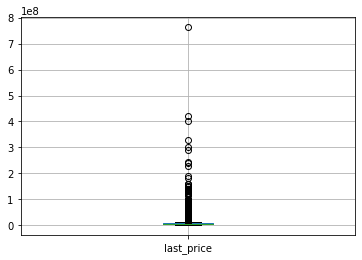

In [55]:
cl_data.boxplot('last_price')

<AxesSubplot:>

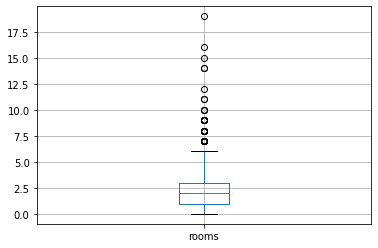

In [56]:
cl_data.boxplot('rooms')

<AxesSubplot:>

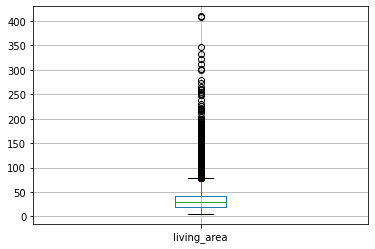

In [57]:
cl_data.boxplot('living_area')

не вижу смысла трогать ничего из верхних графиков , выбросы отсутвуют .Но если требует задание

In [58]:
print(cl_data.shape[0]/data.shape[0])
cl_data = cl_data.loc[cl_data['last_price']<=2000000000]
cl_data = cl_data.loc[cl_data['rooms']<=7]
cl_data = cl_data.loc[cl_data['living_area']<=300]
cl_data.shape[0]/data.shape[0]

0.9961601755348327


0.9144689649352293

не думаю что оно того стоило 

### Добавление новых столбцов

In [59]:
def categorize_floor(row):
     if row['floor']==1:
        return 'первый'
     if row['floors_total']==row['floor']:
        return 'последний'
     return 'другой'

добавление типа этажа

In [60]:
def categorize_housing(row):
     if row>=250000:
        return 'элитка'
     if row>=100000:
        return 'стандарт'
     return 'бюджетное жильё'

разбиение на тип жилья , я считаю что корректнее будет рассматривать каждый тип жилья отдельно , ибо сравнивать человечник с элиткой не совсем корректно 

In [61]:
cl_data['price_per_square_meter'] = cl_data['last_price']/cl_data['total_area']
cl_data['first_day_exposition'] = pd.to_datetime(cl_data['first_day_exposition'],format = '%Y-%m-%dT%H:%M:%S')
cl_data['day_of_the_week'] = cl_data['first_day_exposition'].dt.weekday
cl_data['year'] = pd.DatetimeIndex(cl_data['first_day_exposition']).year
cl_data['floor_type'] = cl_data.apply(categorize_floor, axis=1)
cl_data['city_centers_nearest_km'] = (cl_data['city_centers_nearest']/1000).round(0)
cl_data['type_of_housing'] = cl_data['price_per_square_meter'].apply(categorize_housing)
cl_data['month'] = pd.DatetimeIndex(cl_data['first_day_exposition']).month
cl_data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70          16.0         51.0      8         False   False   
1            2.60          11.0         18.6      1         False   False   
2            2.70           5.0         34.3      4         False   False   
4            3.03          14.0         32.0     13         False   False   
5            2.60          12.0         14.4      5         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      0.0  санкт-петербург           18863.0   
1      False          11.0      2.0           шушары           12817.0   
2      False           8.3      0.0  санкт-петербург           21741.0   
4      False          41.0      0.0  санкт-петербург           31856.0   
5      False           9.1      0.0          янино-1               NaN   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               16028.0               1.0          482.0               2.0   
1               18603.0               0.0            NaN               0.0   
2               13933.0               1.0           90.0               2.0   
4                8098.0               2.0          112.0               1.0   
5                   NaN               NaN            NaN               NaN   

   ponds_nearest  days_exposition  in_the_town type_of_locality  \
0          755.0              NaN         True            город   
1            NaN             81.0        False          посёлок   
2          574.0            558.0         True            город   
4           48.0            121.0         True            город   
5            NaN             55.0        False          посёлок   

   price_per_square_meter  day_of_the_week  year floor_type  \
0           120370.370370                3  2019     другой   
1            82920.792079                1  2018     первый   
2            92785.714286                3  2015     другой   
4           100000.000000                1  2018     другой   
5            95065.789474                0  2018     другой   

   city_centers_nearest_km  type_of_housing  month  
0                     16.0         стандарт      3  
1                     19.0  бюджетное жильё     12  
2                     14.0  бюджетное жильё      8  
4                      8.0         стандарт      6  
5                      NaN  бюджетное жильё      9

добавление столбцов из задания

In [62]:
cl_data.value_counts('type_of_housing')

type_of_housing
бюджетное жильё    12439
стандарт            8996
элитка               237
dtype: int64

элитного жилья не так много , но мы будем считать эту выборку репрезентативной , хотя конечно хотелось бы ещё немного данных

In [63]:
cl_data[(cl_data['type_of_housing']=='элитка')&(cl_data['type_of_locality']=='человечник')]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, in_the_town, type_of_locality, price_per_square_meter, day_of_the_week, year, floor_type, city_centers_nearest_km, type_of_housing, month]
Index: []

вроде бы всё сходиться , думаю добавление столбов из задания завершено 

### Анализ данных

#### Осмотр метрик 

In [64]:
t = ['total_images','last_price','total_area','rooms','ceiling_height','floors_total','living_area','floor','kitchen_area','balcony','airports_nearest','city_centers_nearest','price_per_square_meter','day_of_the_week','year','type_of_housing']
cl_data_to_mattrix = cl_data[t]
cl_data_to_mattrix

total_images  last_price  total_area  rooms  ceiling_height  \
0                20  13000000.0      108.00      3            2.70   
1                 7   3350000.0       40.40      1            2.60   
2                10   5196000.0       56.00      2            2.70   
4                 2  10000000.0      100.00      2            3.03   
5                10   2890000.0       30.40      1            2.60   
...             ...         ...         ...    ...             ...   
23693             9   4600000.0       62.40      3            2.60   
23694             9   9700000.0      133.81      3            3.70   
23695            14   3100000.0       59.00      3            2.60   
23696            18   2500000.0       56.70      2            2.60   
23698             4   1350000.0       32.30      1            2.50   

       floors_total  living_area  floor  kitchen_area  balcony  \
0              16.0         51.0      8         25.00      0.0   
1              11.0         18.6      1         11.00      2.0   
2               5.0         34.3      4          8.30      0.0   
4              14.0         32.0     13         41.00      0.0   
5              12.0         14.4      5          9.10      0.0   
...             ...          ...    ...           ...      ...   
23693           9.0         40.0      8          8.00      0.0   
23694           5.0         73.3      3         13.83      0.0   
23695           5.0         38.0      4          8.50      0.0   
23696           3.0         29.7      1           NaN      0.0   
23698           5.0         12.3      1          9.00      0.0   

       airports_nearest  city_centers_nearest  price_per_square_meter  \
0               18863.0               16028.0           120370.370370   
1               12817.0               18603.0            82920.792079   
2               21741.0               13933.0            92785.714286   
4               31856.0                8098.0           100000.000000   
5                   NaN                   NaN            95065.789474   
...                 ...                   ...                     ...   
23693           45602.0               34104.0            73717.948718   
23694           24665.0                4232.0            72490.845228   
23695               NaN                   NaN            52542.372881   
23696               NaN                   NaN            44091.710758   
23698               NaN                   NaN            41795.665635   

       day_of_the_week  year  type_of_housing  
0                    3  2019         стандарт  
1                    1  2018  бюджетное жильё  
2                    3  2015  бюджетное жильё  
4                    1  2018         стандарт  
5                    0  2018  бюджетное жильё  
...                ...   ...              ...  
23693                4  2016  бюджетное жильё  
23694                1  2017  бюджетное жильё  
23695                0  2018  бюджетное жильё  
23696                6  2018  бюджетное жильё  
23698                4  2017  бюджетное жильё  

[21672 rows x 16 columns]

не пугайтесь , хочу кинуть взляд на данные , может подмечу что-нибудь интересное 

array([[<AxesSubplot:xlabel='total_images', ylabel='total_images'>,
        <AxesSubplot:xlabel='last_price', ylabel='total_images'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_images'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_images'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='total_images'>,
        <AxesSubplot:xlabel='floors_total', ylabel='total_images'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_images'>,
        <AxesSubplot:xlabel='floor', ylabel='total_images'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_images'>,
        <AxesSubplot:xlabel='balcony', ylabel='total_images'>,
        <AxesSubplot:xlabel='airports_nearest', ylabel='total_images'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='total_images'>,
        <AxesSubplot:xlabel='price_per_square_meter', ylabel='total_images'>,
        <AxesSubplot:xlabel='day_of_the_week', ylabel='total_images'>,
        <AxesSubplot:xlabel='year', ylabel='t

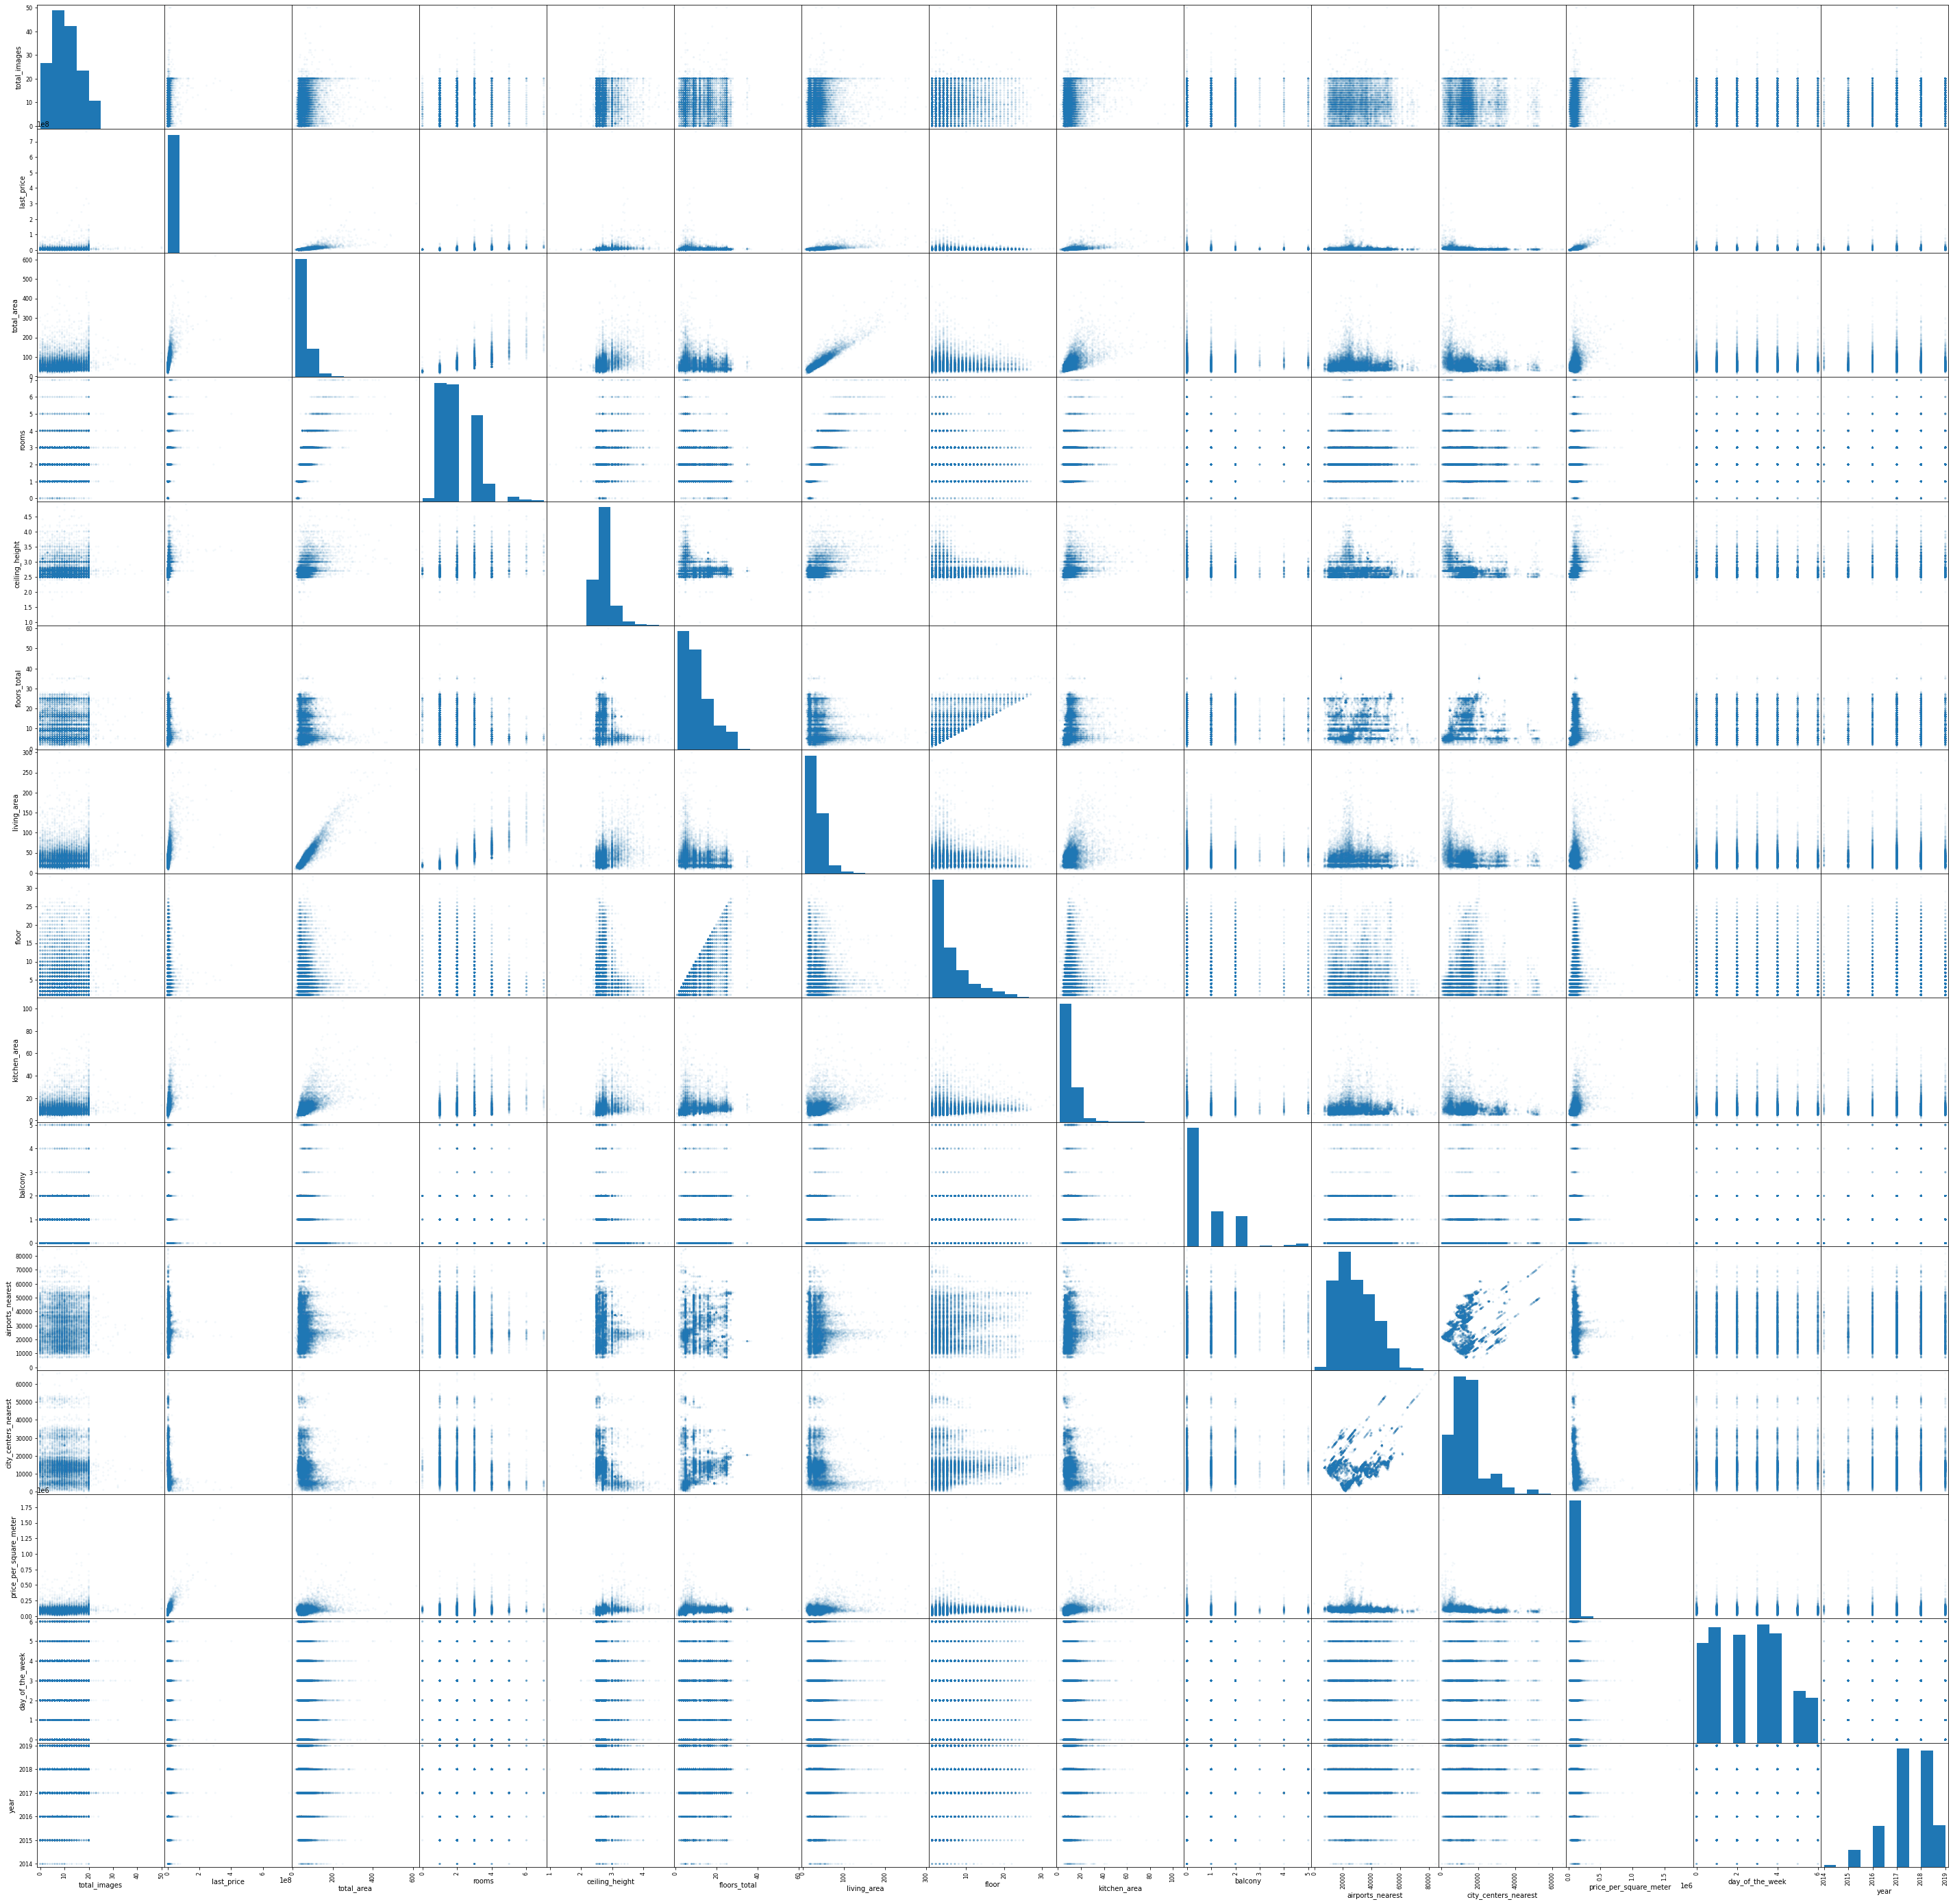

In [65]:
pd.plotting.scatter_matrix(cl_data_to_mattrix,figsize=(50,50),alpha=0.05)

красиво ,на основе этих графиков можно уже сделать какие-то выводы(например видно из графика price_per_square_meter|last price что при увеличение площади расстёт стоимость за квадратный метр) , но мы сейчас рассмотрим подборнее некоторые зависимости 

In [66]:
#print(cl_data_to_mattrix['type_of_housing'].unique())
#for item in cl_data_to_mattrix['type_of_housing'].unique():
    #op = cl_data_to_mattrix.loc[cl_data_to_mattrix['type_of_housing'] == item]
    #if item != 'элитка':
    #    pd.plotting.scatter_matrix(op,figsize=(50,50),alpha=0.05)
    #else :
    #    pd.plotting.scatter_matrix(op,figsize=(50,50),alpha=0.5)

count    21672.000000
mean        59.642519
std         32.246901
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        618.000000
Name: total_area, dtype: float64

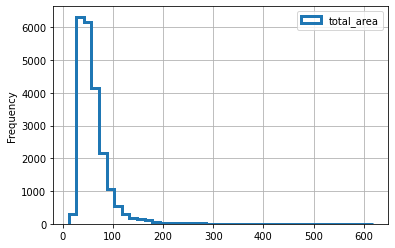

In [67]:
cl_data.plot(kind = 'hist',y = 'total_area',linewidth = 3,grid = True,histtype = 'step',bins = 40) 
cl_data['total_area'].describe()

в данной ситуации значения около 1000 кв метров не являются выбросами , поэтому для большей точности предлагаю в дальнейшем иследовать именно разбивая на категории жилья 
<br>вывод по общему графику: большинство квартир имеет скромную площадь в диапозоне 40-70 кв метров 

['стандарт' 'бюджетное жильё' 'элитка']
count    8996.000000
mean       61.134831
std        34.737699
min        12.000000
25%        38.000000
50%        51.000000
75%        73.000000
max       491.000000
Name: total_area, dtype: float64
count    12439.000000
mean        56.959085
std         26.025232
min         14.000000
25%         41.400000
50%         52.000000
75%         65.900000
max        470.300000
Name: total_area, dtype: float64
count    237.000000
mean     143.838312
std       78.826942
min       13.000000
25%       93.000000
50%      125.000000
75%      172.400000
max      618.000000
Name: total_area, dtype: float64


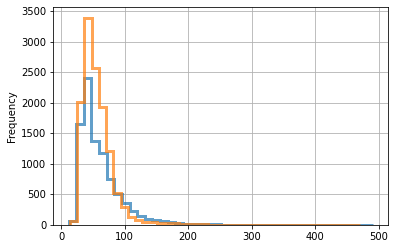

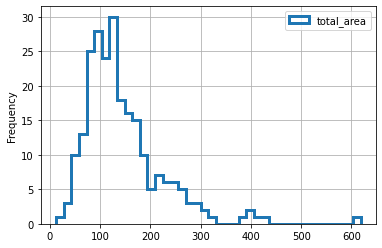

In [68]:
print(cl_data['type_of_housing'].unique())
for item in cl_data['type_of_housing'].unique():
    if item != 'элитка':
        op = cl_data.loc[cl_data['type_of_housing'] == item]
        print(op['total_area'].describe())
        op['total_area'].plot(kind = 'hist',y = 'total_area',linewidth = 3,grid = True,histtype = 'step',alpha = 0.7,bins = 40) 
    if item == 'элитка':
        cl_data.loc[cl_data['type_of_housing'] == item].plot(kind = 'hist',y = 'total_area',linewidth = 3,grid = True,histtype = 'step',bins = 40) 
        print(cl_data.loc[cl_data['type_of_housing'] == item,'total_area'].describe())

<br>вывод по графику бюджетного жилья: по сравнению с общим графиком и стандартым жильём разницы особо нет 
<br>вывод по графику стандартного жилья: Q3 имеет большую площадь по сравнению с бюджетным жильём 
<br>вывод по графику элитного жилья: очень сильно отличается по площади жилья в среднем имеет размер от 87 до 170 кв м 

точно можно же просто разделить на дата сеты 

In [69]:
cl_data_elit = cl_data.loc[cl_data['type_of_housing'] == 'элитка']
cl_data_standard = cl_data.loc[cl_data['type_of_housing'] == 'стандарт']
cl_data_budget = cl_data.loc[cl_data['type_of_housing'] == 'бюджетное жильё']

count    21672.000000
mean        34.142468
std         20.586739
min          5.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        300.000000
Name: living_area, dtype: float64
count    12439.000000
mean        33.690783
std         17.446883
min          5.400000
25%         19.800000
50%         30.400000
75%         42.200000
max        279.600000
Name: living_area, dtype: float64
count    8996.000000
mean       33.579739
std        22.018597
min         5.000000
25%        18.000000
50%        28.900000
75%        41.300000
max       300.000000
Name: living_area, dtype: float64


count    237.000000
mean      79.209241
std       48.307806
min       10.000000
25%       47.000000
50%       64.000000
75%       95.400000
max      258.000000
Name: living_area, dtype: float64

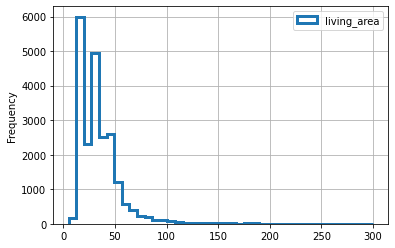

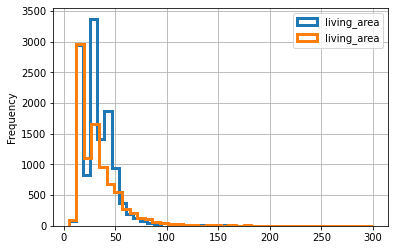

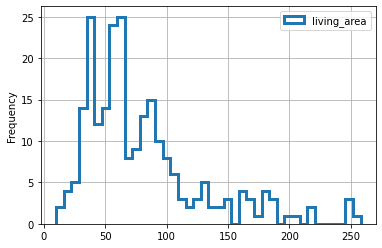

In [70]:
cl_data.plot(kind = 'hist',y = 'living_area',linewidth = 3,grid = True,histtype = 'step',bins = 40) 
print(cl_data['living_area'].describe())
ax = cl_data_budget.plot(kind = 'hist',y = 'living_area',linewidth = 3,grid = True,histtype = 'step',bins = 40) 
print(cl_data_budget['living_area'].describe())
cl_data_standard.plot(kind = 'hist',y = 'living_area',ax = ax,linewidth = 3,grid = True,histtype = 'step',bins = 40) 
print(cl_data_standard['living_area'].describe())
cl_data_elit.plot(kind = 'hist',y = 'living_area',linewidth = 3,grid = True,histtype = 'step',bins = 40) 
cl_data_elit['living_area'].describe()

<b>living area</b>
<br>вывод по общему графику: график схож с графиком выше , только речь идёт о более маленьких площадях
<br>вывод по графику бюджетного жилья:  удивительно , но он Идентиичен общему графику
<br>вывод по графику стандартного жилья: площадь ниже чем в бюджетном жилье 
<br>вывод по графику элитного жилья: общая площадь также выше чем у остальных типов жилья

я буду ещё умнее я сделаю функцию 

In [71]:
def automation(data,data2,data3,data4,t):
    data.plot(kind = 'hist',y = t,linewidth = 3,grid = True,histtype = 'step',bins = 40) 
    print(data[t].describe())
    ax = data2.plot(kind = 'hist',y = t,linewidth = 3,grid = True,histtype = 'step',bins = 40) 
    print(data2[t].describe())
    data3.plot(kind = 'hist',y = t,ax = ax,linewidth = 3,grid = True,histtype = 'step',bins = 40) 
    print(data3[t].describe())
    data4.plot(kind = 'hist',y = t,linewidth = 3,grid = True,histtype = 'step',bins = 40) 
    print(data4[t].describe())

count    20865.000000
mean        10.471114
std          5.705363
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64
count    12030.000000
mean         9.261911
std          4.036057
min          2.000000
25%          6.500000
50%          8.450000
75%         10.700000
max        100.700000
Name: kitchen_area, dtype: float64
count    8606.000000
mean       11.782562
std         6.266504
min         1.300000
25%         8.100000
50%        10.200000
75%        13.100000
max        70.000000
Name: kitchen_area, dtype: float64
count    229.000000
mean      24.708603
std       17.075264
min        3.700000
25%       13.740000
50%       20.000000
75%       29.800000
max      107.000000
Name: kitchen_area, dtype: float64


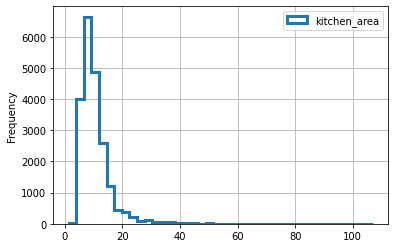

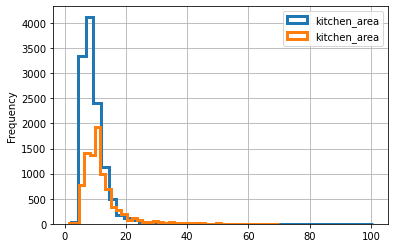

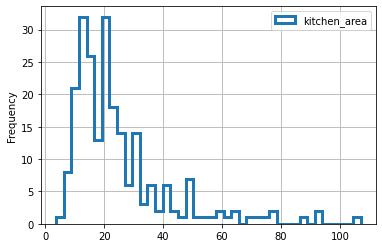

In [72]:
automation(cl_data,cl_data_budget,cl_data_standard,cl_data_elit,'kitchen_area')

<b>kitchen_area</b>
скучно , у всех площадей похожие ситуации и графики , только здесь площадь стандартных кухонь сильно превосходит бюджетные кухни 

In [73]:
cl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21672 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             21672 non-null  int64         
 1   last_price               21672 non-null  float64       
 2   total_area               21672 non-null  float64       
 3   first_day_exposition     21672 non-null  datetime64[ns]
 4   rooms                    21672 non-null  int64         
 5   ceiling_height           21672 non-null  float64       
 6   floors_total             21619 non-null  float64       
 7   living_area              21672 non-null  float64       
 8   floor                    21672 non-null  int64         
 9   is_apartment             21672 non-null  bool          
 10  studio                   21672 non-null  bool          
 11  open_plan                21672 non-null  bool          
 12  kitchen_area             20865 n

count    2.167200e+04
mean     6.405448e+06
std      1.018737e+07
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64
count    1.243900e+04
mean     4.301541e+06
std      2.360603e+06
min      4.300000e+05
25%      2.900000e+06
50%      3.900000e+06
75%      5.190000e+06
max      3.500000e+07
Name: last_price, dtype: float64
count    8.996000e+03
mean     7.915431e+06
std      5.810780e+06
min      1.900000e+06
25%      4.490000e+06
50%      6.150000e+06
75%      9.274574e+06
max      9.900000e+07
Name: last_price, dtype: float64
count    2.370000e+02
mean     5.951387e+07
std      6.925788e+07
min      3.800000e+06
25%      2.760000e+07
50%      4.000000e+07
75%      6.513818e+07
max      7.630000e+08
Name: last_price, dtype: float64


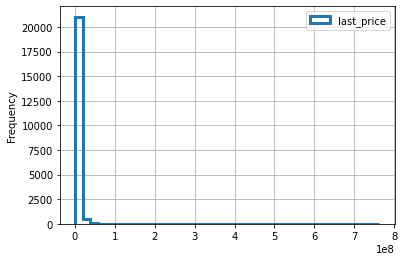

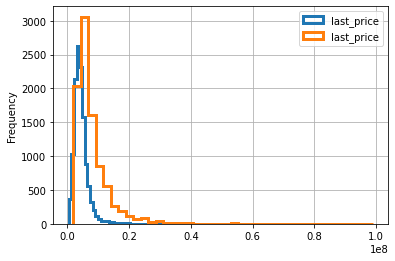

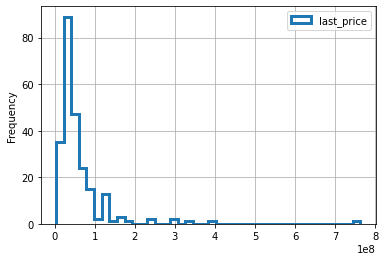

In [74]:
automation(cl_data,cl_data_budget,cl_data_standard,cl_data_elit,'last_price')

<b>last_price</b>
<br>вывод по общему графику: большинство квартир имеют стоимость до 20млн руб 
<br>вывод по графику бюджетного жилья: 
<br>вывод по графику стандартного жилья: 
<br>вывод по графику элитного жилья: стоимость квартир очень сильно отличается от остального типа жилья 

count    21672.000000
mean         2.060954
std          1.032410
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64
count    12439.000000
mean         2.150253
std          0.997431
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64
count    8996.000000
mean        1.908293
std         1.042474
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64
count    237.000000
mean       3.168776
std        1.216498
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: rooms, dtype: float64


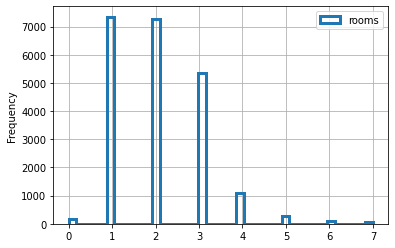

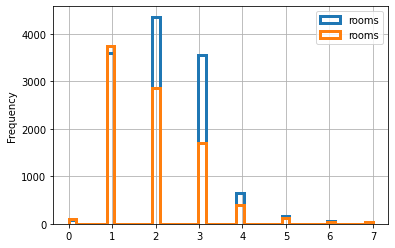

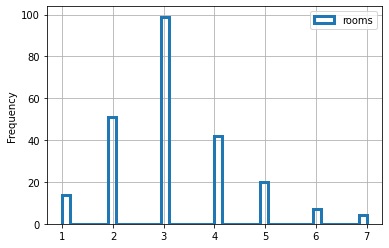

In [75]:
automation(cl_data,cl_data_budget,cl_data_standard,cl_data_elit,'rooms')

<b>rooms</b>
<br>вывод по общему графику: большинство квартир имеют количество комнат от 1 до 3 
<br>вывод по графику бюджетного жилья: 
<br>вывод по графику стандартного жилья: интересная ситуация стандартное жильё имеет в среднем меньше комнат чем бюджетное жильё 
<br>вывод по графику элитного жилья: половина квартир 3х комнатные , ну и по стандарту количество комнат больше чем у остальных типов жилья

count    21672.000000
mean         2.704997
std          0.231070
min          1.000000
25%          2.570000
50%          2.650000
75%          2.750000
max          4.900000
Name: ceiling_height, dtype: float64
count    12439.000000
mean         2.652599
std          0.187161
min          1.200000
25%          2.550000
50%          2.600000
75%          2.700000
max          4.700000
Name: ceiling_height, dtype: float64
count    8996.000000
mean        2.766028
std         0.253136
min         1.000000
25%         2.600000
50%         2.700000
75%         2.800000
max         4.500000
Name: ceiling_height, dtype: float64
count    237.000000
mean       3.138523
std        0.372858
min        2.500000
25%        3.000000
50%        3.080000
75%        3.300000
max        4.900000
Name: ceiling_height, dtype: float64


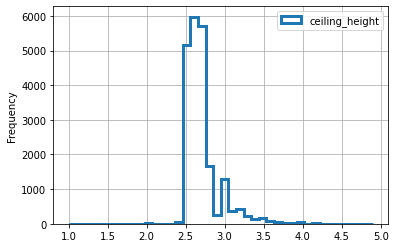

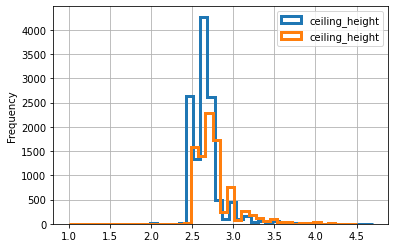

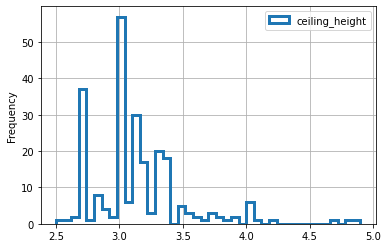

In [76]:
automation(cl_data,cl_data_budget,cl_data_standard,cl_data_elit,'ceiling_height')

<b>ceiling_height</b>
<br>вывод по общему графику: средняя высота потолков составляет от 2.5 до 2.8
<br>вывод по графику бюджетного жилья: имеет самую маленькую высоту потолков 
<br>вывод по графику стандартного жилья: в среднем имеет высоту потолка на 10 см больше 
<br>вывод по графику элитного жилья: высота потолков сильно отличается средняя высота потолков выше 3х метров 

count    21672.000000
mean         5.882567
std          4.862059
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64
count    12439.000000
mean         5.106922
std          4.384277
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         33.000000
Name: floor, dtype: float64
count    8996.000000
mean        6.980547
std         5.297986
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max        31.000000
Name: floor, dtype: float64
count    237.000000
mean       4.915612
std        3.042295
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       23.000000
Name: floor, dtype: float64


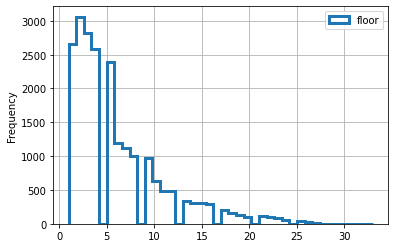

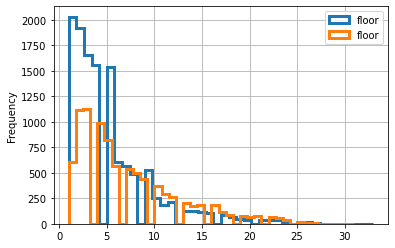

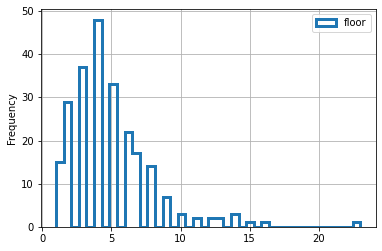

In [77]:
automation(cl_data,cl_data_budget,cl_data_standard,cl_data_elit,'floor')

<b>floor</b>
<br>вывод по всем графикам: стандартное и элитное  жильё почти отсутсвует на первом этаже ,также бюджетного жилья больше на первом этаже чем других типов. а в остальном всё логично чем выше , тем меньше предложений 

count      21672
unique         3
top       другой
freq       15972
Name: floor_type, dtype: object
count      12439
unique         3
top       другой
freq        8382
Name: floor_type, dtype: object
count       8996
unique         3
top       другой
freq        7403
Name: floor_type, dtype: object


count        237
unique         3
top       другой
freq         187
Name: floor_type, dtype: object

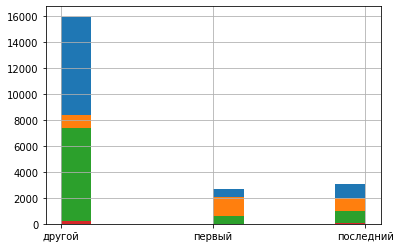

In [78]:
cl_data['floor_type'].hist()
print(cl_data['floor_type'].describe())
cl_data_budget['floor_type'].hist()
print(cl_data_budget['floor_type'].describe())
cl_data_standard['floor_type'].hist()
print(cl_data_standard['floor_type'].describe())
cl_data_elit['floor_type'].hist()
cl_data_elit['floor_type'].describe()

<b>floor_type</b>
<br>вывод по всем графикам: этот график лишь подтверждает наши слова по графику floor

count    21619.000000
mean        10.644664
std          6.564166
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
count    12411.000000
mean         9.257997
std          5.974360
min          1.000000
25%          5.000000
50%          9.000000
75%         12.000000
max         60.000000
Name: floors_total, dtype: float64
count    8971.000000
mean       12.636941
std         6.875923
min         2.000000
25%         6.000000
50%        12.000000
75%        17.000000
max        37.000000
Name: floors_total, dtype: float64
count    237.000000
mean       7.848101
std        3.636288
min        2.000000
25%        6.000000
50%        7.000000
75%        9.000000
max       24.000000
Name: floors_total, dtype: float64


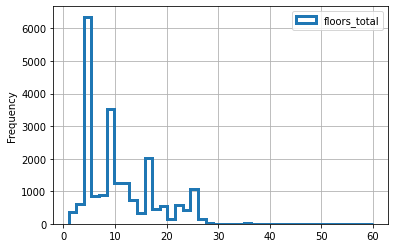

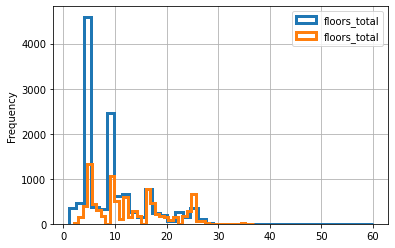

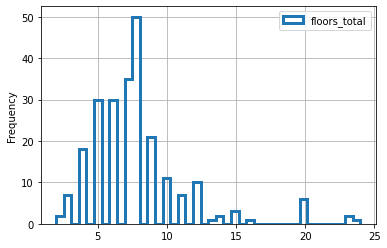

In [79]:
automation(cl_data,cl_data_budget,cl_data_standard,cl_data_elit,'floors_total')

<b>floors_total</b>
<br>вывод по всем графикам: остовное количество этажей соответствует 5 9 16 25 , это типовые значения , но что интересно элитное жильё располагается в менее высотных зданиях по отношению к другим типам жилья 

count    16798.000000
mean     14257.844803
std       8669.654319
min        181.000000
25%       9344.750000
50%      13123.000000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64
count     7886.000000
mean     17292.393609
std       9925.206130
min        287.000000
25%      11647.250000
50%      14986.000000
75%      19942.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64
count     8684.000000
mean     11741.315177
std       6212.634295
min        181.000000
25%       7518.000000
50%      11968.000000
75%      14726.000000
max      59052.000000
Name: city_centers_nearest, dtype: float64
count      228.000000
mean      5148.596491
std       4246.634277
min        318.000000
25%       2389.000000
50%       5249.000000
75%       6563.500000
max      51115.000000
Name: city_centers_nearest, dtype: float64


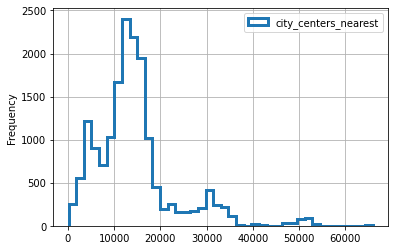

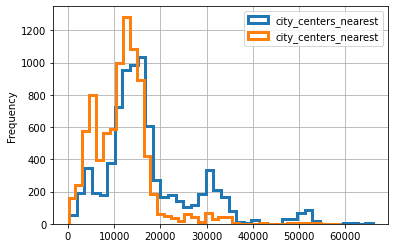

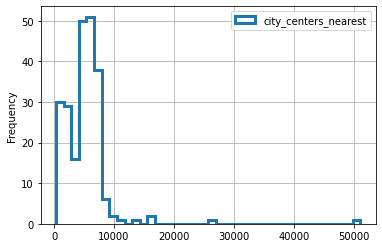

In [80]:
automation(cl_data,cl_data_budget,cl_data_standard,cl_data_elit,'city_centers_nearest')

<b>city_centers_nearest</b>
<br>вывод по всем графикам: основное количество квартир находиться на расстояние 7-15км от центра и чем выше уровень типа жилья , тем квартиры находятся ближе к центру 

count    16779.000000
mean     28778.379343
std      12661.031153
min          0.000000
25%      18539.000000
50%      26689.000000
75%      37244.000000
max      84869.000000
Name: airports_nearest, dtype: float64
count     7882.000000
mean     29125.100228
std      13309.683873
min       6450.000000
25%      18396.000000
50%      25999.000000
75%      38802.000000
max      84869.000000
Name: airports_nearest, dtype: float64
count     8669.000000
mean     28523.775983
std      12166.026198
min          0.000000
25%      18695.000000
50%      27516.000000
75%      36827.000000
max      73827.000000
Name: airports_nearest, dtype: float64
count      228.000000
mean     26472.688596
std       5842.992900
min      11018.000000
25%      22992.000000
50%      25800.000000
75%      28282.000000
max      70016.000000
Name: airports_nearest, dtype: float64


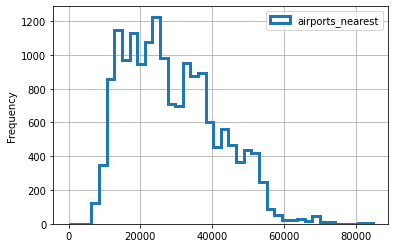

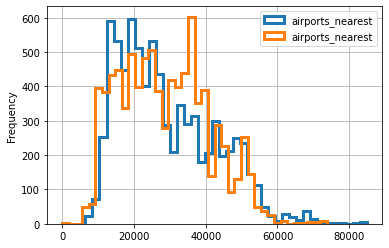

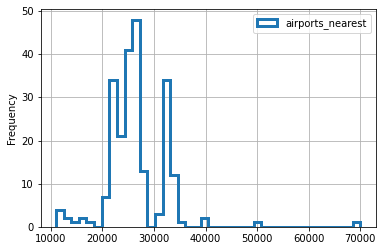

In [81]:
automation(cl_data,cl_data_budget,cl_data_standard,cl_data_elit,'airports_nearest')

<b>airports_nearest</b>
<br>вывод по всем графикам:с аэропортом не всё так однозначно , могу сказать что квартиры как правило расположены в удаление от него .

count    7445.000000
mean      488.090934
std       337.400204
min         1.000000
25%       288.000000
50%       451.000000
75%       611.000000
max      3190.000000
Name: parks_nearest, dtype: float64
count    3121.000000
mean      466.851330
std       288.103433
min         1.000000
25%       283.000000
50%       447.000000
75%       599.000000
max      3190.000000
Name: parks_nearest, dtype: float64
count    4143.000000
mean      508.371711
std       370.737576
min         3.000000
25%       300.500000
50%       456.000000
75%       624.000000
max      3190.000000
Name: parks_nearest, dtype: float64
count     181.000000
mean      390.110497
std       281.791312
min        21.000000
25%       164.000000
50%       339.000000
75%       563.000000
max      2218.000000
Name: parks_nearest, dtype: float64


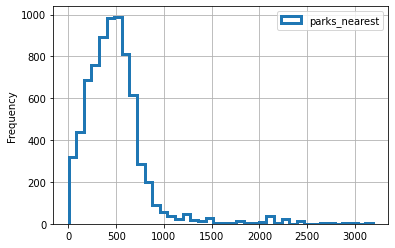

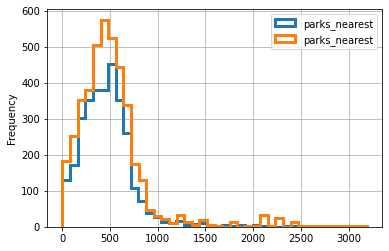

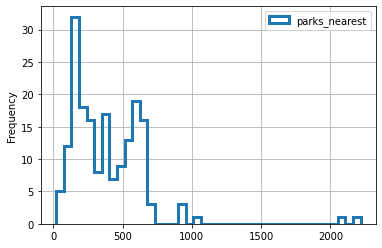

In [82]:
automation(cl_data,cl_data_budget,cl_data_standard,cl_data_elit,'parks_nearest')

<b>parks_nearest</b>
<br>вывод по всем графикам:очень много пропусков в этом столбике , поэтому говорить наверняка нельзя , но в среднем среднее расстояние до парка 500м , у элиток ближе(пометка у тех домов , где рядом есть парк) 

count    21672.000000
mean         2.552418
std          1.782617
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_the_week, dtype: float64
count    12439.000000
mean         2.569097
std          1.786083
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_the_week, dtype: float64
count    8996.000000
mean        2.528679
std         1.777870
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         6.000000
Name: day_of_the_week, dtype: float64
count    237.000000
mean       2.578059
std        1.777694
min        0.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: day_of_the_week, dtype: float64


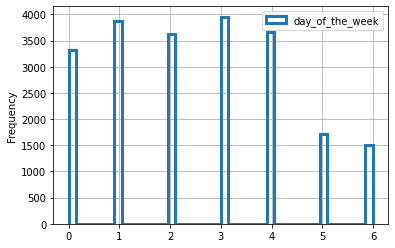

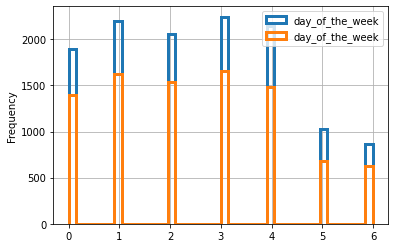

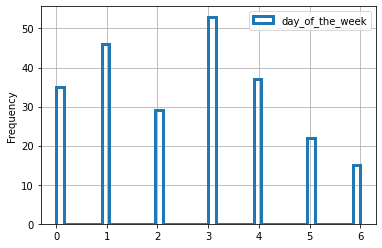

In [83]:
automation(cl_data,cl_data_budget,cl_data_standard,cl_data_elit,'day_of_the_week')

<b>day_of_the_week</b>
<br>вывод по всем графикам:видно что в выходные объявления выставляют реже , это может быть связанно с тем что как правило по выходным агенты по недвижемости не работают 

count    21672.000000
mean         6.424742
std          3.466560
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64
count    12439.000000
mean         6.457513
std          3.450606
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64
count    8996.000000
mean        6.378835
std         3.488103
min         1.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        12.000000
Name: month, dtype: float64
count    237.000000
mean       6.447257
std        3.476672
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: month, dtype: float64


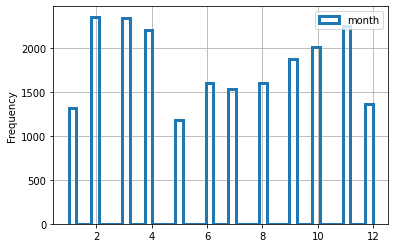

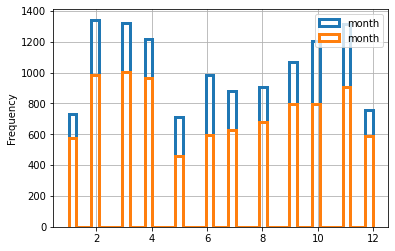

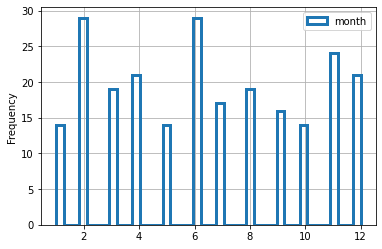

In [84]:
automation(cl_data,cl_data_budget,cl_data_standard,cl_data_elit,'month')

<b>month</b>
<br>вывод по всем графикам:видна интересная тенденция , летом активность минимальна , осенью количество объявлений плавно растёт и в декабре январе провал , после чего скачёк до значений ноября и плавное понижение к лету 
<br> природа снижения к лету мне ясна , люди уходят в отпуск и из-за хорошей погоды расспределяют время по другому (больше на себя , а не серьёзные дела) , но вот провал в декабре мне не понятен 

count    18709.000000
mean       184.666631
std        220.906741
min          1.000000
25%         44.000000
50%        101.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64
count    11066.000000
mean       184.587385
std        216.031781
min          1.000000
25%         45.000000
50%        104.000000
75%        240.750000
max       1580.000000
Name: days_exposition, dtype: float64
count    7465.000000
mean      181.877696
std       224.909089
min         2.000000
25%        39.000000
50%        95.000000
75%       231.000000
max      1553.000000
Name: days_exposition, dtype: float64
count     178.000000
mean      306.556180
std       303.310081
min         4.000000
25%        86.750000
50%       203.500000
75%       456.500000
max      1572.000000
Name: days_exposition, dtype: float64


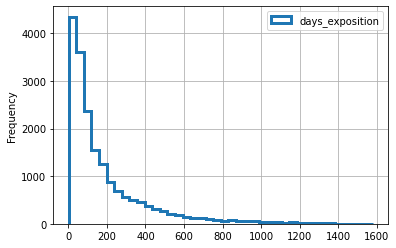

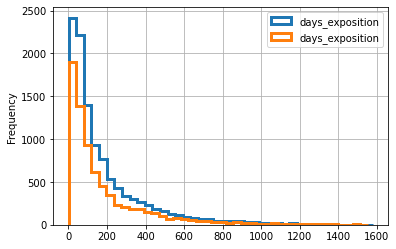

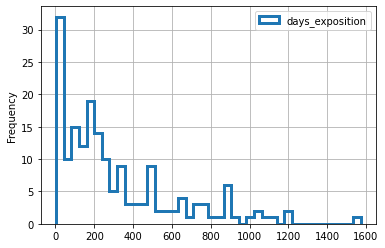

In [85]:
automation(cl_data,cl_data_budget,cl_data_standard,cl_data_elit,'days_exposition')

<b>days_exposition</b>
<br>вывод по всем графикам:быстрой продажей можно назвать если продаётся квартира быстрее 45 дней , медленно если более 7 месяцев (для дорогих квартир быстро - 3 месяца , медленно - больше 1,5 лет) 

In [86]:
print(cl_data['days_exposition'].median())
print(cl_data_budget['days_exposition'].median())
print(cl_data_standard['days_exposition'].median())
cl_data_elit['days_exposition'].median()

101.0
104.0
95.0


203.5

вот подтвержение 

In [87]:
cl_data.head(3)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0             2.7          16.0         51.0      8         False   False   
1             2.6          11.0         18.6      1         False   False   
2             2.7           5.0         34.3      4         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      0.0  санкт-петербург           18863.0   
1      False          11.0      2.0           шушары           12817.0   
2      False           8.3      0.0  санкт-петербург           21741.0   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               16028.0               1.0          482.0               2.0   
1               18603.0               0.0            NaN               0.0   
2               13933.0               1.0           90.0               2.0   

   ponds_nearest  days_exposition  in_the_town type_of_locality  \
0          755.0              NaN         True            город   
1            NaN             81.0        False          посёлок   
2          574.0            558.0         True            город   

   price_per_square_meter  day_of_the_week  year floor_type  \
0           120370.370370                3  2019     другой   
1            82920.792079                1  2018     первый   
2            92785.714286                3  2015     другой   

   city_centers_nearest_km  type_of_housing  month  
0                     16.0         стандарт      3  
1                     19.0  бюджетное жильё     12  
2                     14.0  бюджетное жильё      8

освежим память о столбцах

['город' 'посёлок' 'человечник' 'областной город' 'деревня']
count    12586.000000
mean       184.851978
std        224.964024
min          1.000000
25%         41.000000
50%         99.000000
75%        236.000000
max       1572.000000
Name: days_exposition, dtype: float64
count    3283.000000
mean      185.167225
std       207.848902
min         3.000000
25%        45.000000
50%       108.000000
75%       249.000000
max      1485.000000
Name: days_exposition, dtype: float64
count     877.000000
mean      152.765108
std       197.804830
min         3.000000
25%        35.000000
50%        77.000000
75%       178.000000
max      1313.000000
Name: days_exposition, dtype: float64
count    1478.000000
mean      192.790934
std       223.744844
min         3.000000
25%        45.000000
50%       113.000000
75%       252.000000
max      1512.000000
Name: days_exposition, dtype: float64
count     485.000000
mean      209.395876
std       226.106691
min         3.000000
25%        52.000000
50

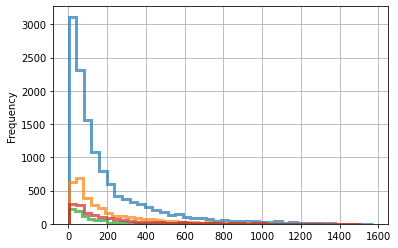

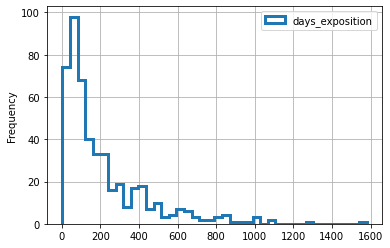

In [88]:
print(cl_data['type_of_locality'].unique())
for item in cl_data['type_of_locality'].unique():
    if item != 'деревня':
        op = cl_data.loc[cl_data['type_of_locality'] == item]
        print(op['days_exposition'].describe())
        op['days_exposition'].plot(kind = 'hist',y = 'days_exposition',linewidth = 3,grid = True,histtype = 'step',alpha = 0.7,bins = 40) 
    if item == 'деревня':
        cl_data.loc[cl_data['type_of_locality'] == item].plot(kind = 'hist',y = 'days_exposition',linewidth = 3,grid = True,histtype = 'step',bins = 40) 
        print(cl_data.loc[cl_data['type_of_locality'] == item,'days_exposition'].describe())

<b>days_exposition</b> по типу населённого пункта 
<br>вывод по всем графикам:бросаются в глаза продажи человечника , они продаются куда быстрее чем остальное жильё , с областным жильём ситуация ровно наоборот 

#### Осмотр зависимость цены от различных метрик  

In [89]:
cl_data.head(3)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0             2.7          16.0         51.0      8         False   False   
1             2.6          11.0         18.6      1         False   False   
2             2.7           5.0         34.3      4         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      0.0  санкт-петербург           18863.0   
1      False          11.0      2.0           шушары           12817.0   
2      False           8.3      0.0  санкт-петербург           21741.0   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               16028.0               1.0          482.0               2.0   
1               18603.0               0.0            NaN               0.0   
2               13933.0               1.0           90.0               2.0   

   ponds_nearest  days_exposition  in_the_town type_of_locality  \
0          755.0              NaN         True            город   
1            NaN             81.0        False          посёлок   
2          574.0            558.0         True            город   

   price_per_square_meter  day_of_the_week  year floor_type  \
0           120370.370370                3  2019     другой   
1            82920.792079                1  2018     первый   
2            92785.714286                3  2015     другой   

   city_centers_nearest_km  type_of_housing  month  
0                     16.0         стандарт      3  
1                     19.0  бюджетное жильё     12  
2                     14.0  бюджетное жильё      8

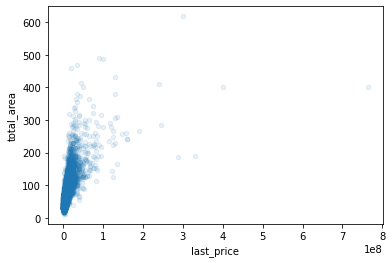

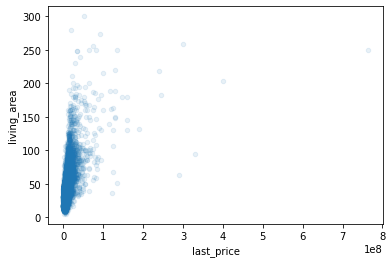

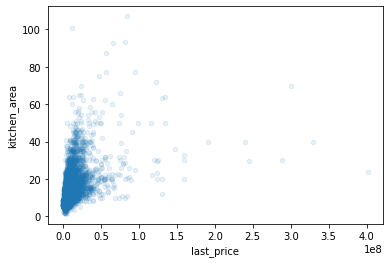

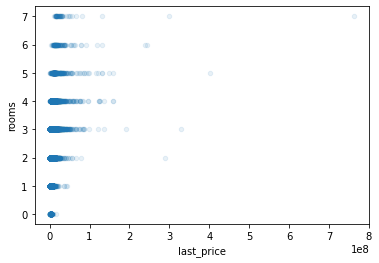

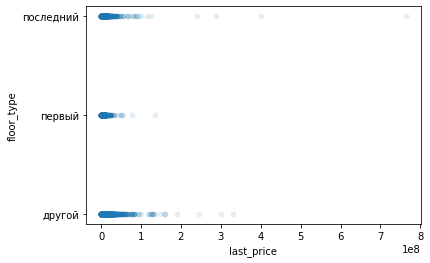

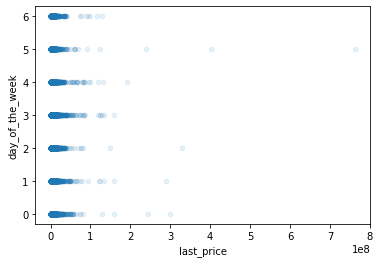

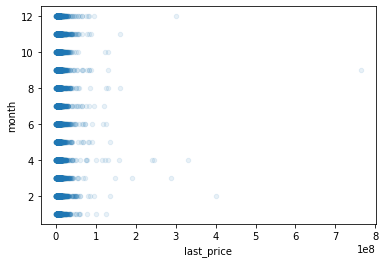

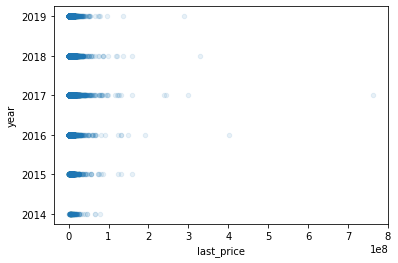

In [90]:
metrics = ['total_area','living_area','kitchen_area','rooms','floor_type','day_of_the_week','month','year']
for item in metrics:
    cl_data.plot(x = 'last_price' , y = item , kind = 'scatter',alpha = 0.1)

(общий график)
<br><b>зависимость от total_area</b> 
<br>вывод по графику: цена увеличивается при увилечение площади (но площадь растёт быстрее цены) 
<br><b>зависимость от living_area</b> 
<br>вывод по графику: аналогично 
<br><b>зависимость от kitchen_area</b> 
<br>вывод по графику: аналогично 
<br><b>зависимость от rooms</b> 
<br>вывод по графику: при увеличение комнат минимальная и средняя стоимость расстёт 
<br><b>зависимость от floor_type</b> 
<br>вывод по графику: самые дешёвые квартиры находятся на первом этаже 
<br><b>зависимость от day_of_the_week</b> 
<br>вывод по графику: нет зависимости 
<br><b>зависимость от month</b> 
<br>вывод по графику: нет зависимости 
<br><b>зависимость от month</b> 
<br>вывод по графику: до 2017 года шёл рост недвижимости , потом случился спад стоимости 
<br>(небольшой комментарий , нужно было ограничить график 2*10^8

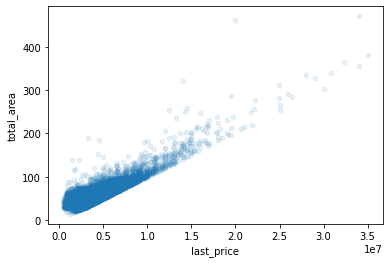

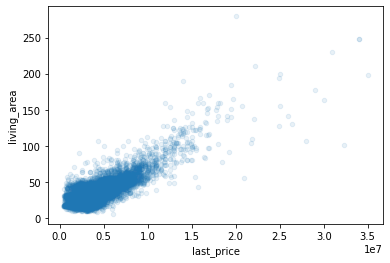

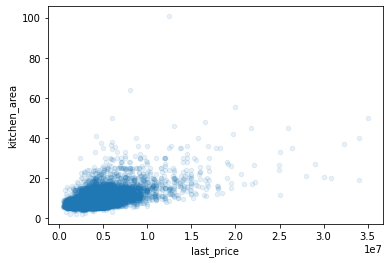

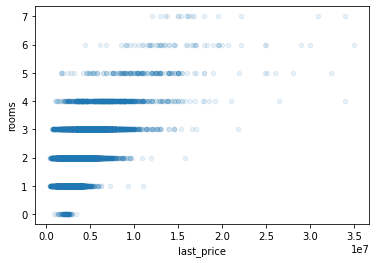

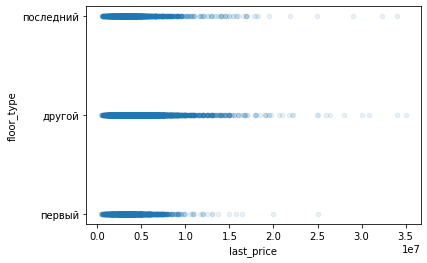

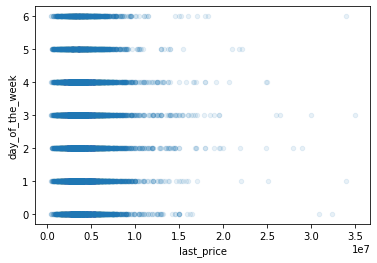

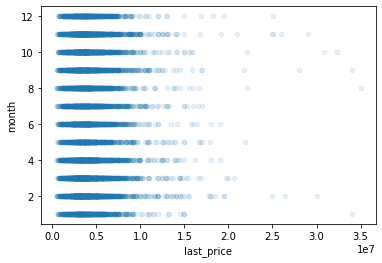

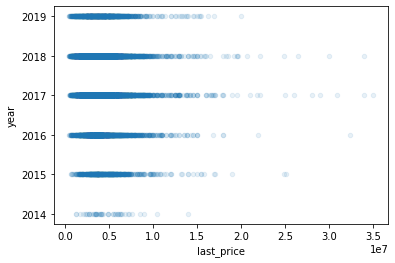

In [91]:
metrics = ['total_area','living_area','kitchen_area','rooms','floor_type','day_of_the_week','month','year']
for item in metrics:
    cl_data_budget.plot(x = 'last_price' , y = item , kind = 'scatter',alpha = 0.1)

(график бюджетного )
<br><b>зависимость от total_area</b> 
<br>вывод по графику: графки стал чуть более линейный , но общий вывод всё ещё справедлив 
<br><b>зависимость от living_area</b> 
<br>вывод по графику: аналогично 
<br><b>зависимость от kitchen_area</b> 
<br>вывод по графику: аналогично 
<br>больше интересных наблюдений нет 

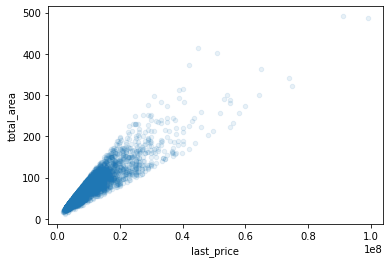

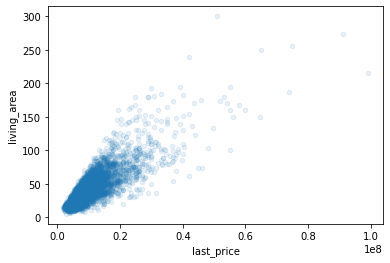

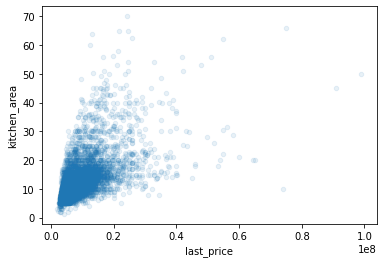

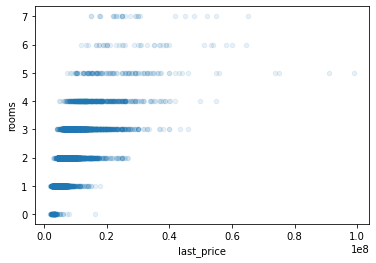

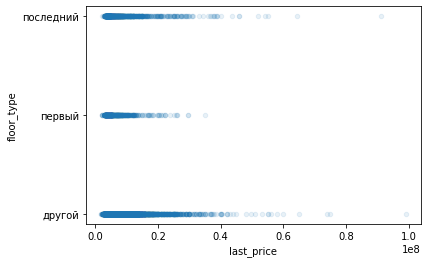

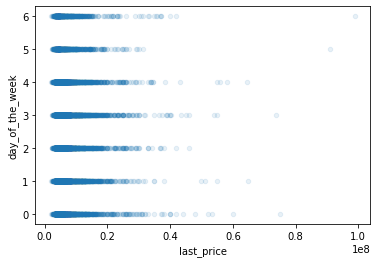

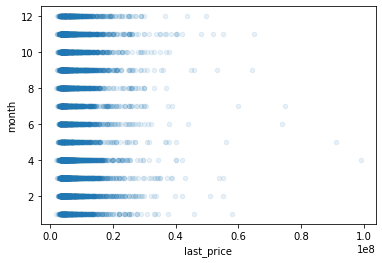

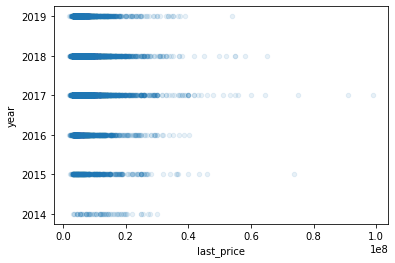

In [92]:
metrics = ['total_area','living_area','kitchen_area','rooms','floor_type','day_of_the_week','month','year']
for item in metrics:
    cl_data_standard.plot(x = 'last_price' , y = item , kind = 'scatter',alpha = 0.1)

(график стандарт )
<br><b>зависимость от total_area</b> 
<br>вывод по графику: самый линейный график
<br><b>зависимость от living_area</b> 
<br>вывод по графику: аналогично 
<br><b>зависимость от kitchen_area</b> 
<br>вывод по графику: аналогично 
<br><b>зависимость от floor_type</b> 
<br>вывод по графику: цена на первом этаже ниже , чем на остальных 
<br>больше интересных наблюдений нет 


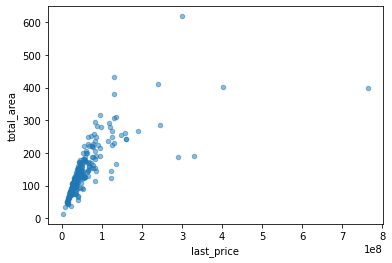

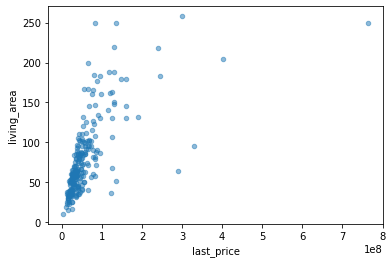

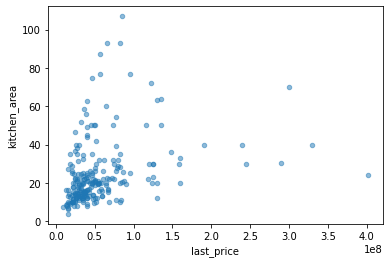

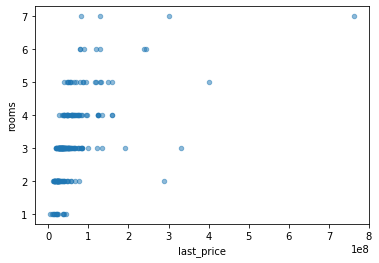

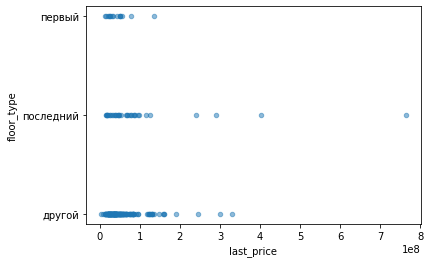

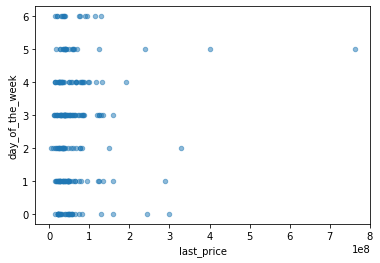

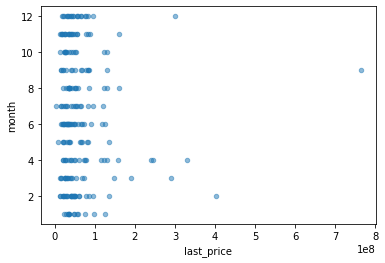

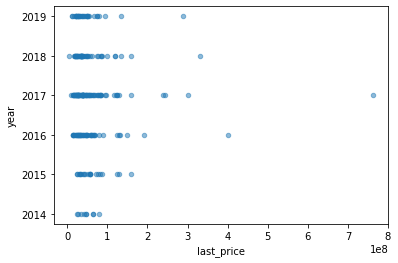

In [93]:
metrics = ['total_area','living_area','kitchen_area','rooms','floor_type','day_of_the_week','month','year']
for item in metrics:
    cl_data_elit.plot(x = 'last_price' , y = item , kind = 'scatter',alpha = 0.5)

(график элита )
<br><b>зависимость от month</b> 
<br>вывод по графику: самые дорогие предложения не выставляются летом 
<br>больше интересных наблюдений нет 


<AxesSubplot:xlabel='last_price', ylabel='floor_type'>

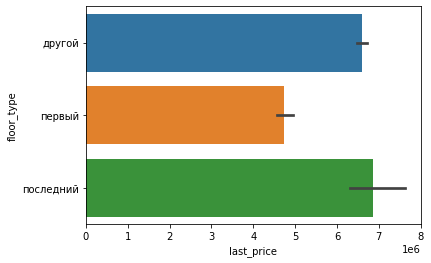

In [95]:
sns.barplot(data=cl_data,x='last_price', y='floor_type')

о график выглядет прикольно , как я говорил выше первый этаж самый дешёвый . Дополнение верхние этажи самые дорогие, но разброс цен куда выше чем на остальных этажах.

<AxesSubplot:xlabel='day_of_the_week', ylabel='last_price'>

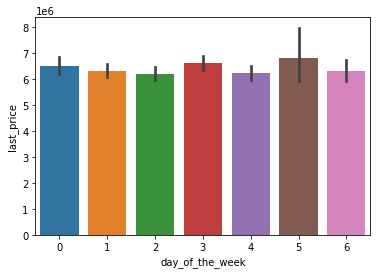

In [96]:
sns.barplot(data=cl_data,x='day_of_the_week', y='last_price')

цена минимально зависит от дня недели в субботу чуть больше , но и разброс в этот день выше чем в остальные 

<AxesSubplot:xlabel='month', ylabel='last_price'>

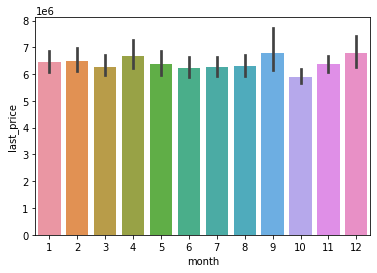

In [97]:
sns.barplot(data=cl_data,x='month', y='last_price')

аналогично , зависимость от месяца минимальна , единственное что можно выделить 9 и 10 месяц , они имеют максимальное и минимальное значение соответственно 

<AxesSubplot:xlabel='year', ylabel='last_price'>

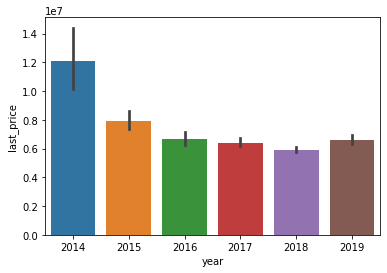

In [98]:
sns.barplot(data=cl_data,x='year', y='last_price')

<AxesSubplot:xlabel='last_price', ylabel='year'>

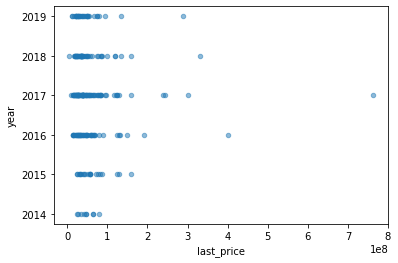

In [99]:
cl_data_elit.plot(x = 'last_price' , y = 'year' , kind = 'scatter',alpha = 0.5)

средняя стоимость жилья с 2014 года по 2018 падала. 
<br>Примечание 1:возможно результаты не совсем корректны из-за недостаточного количества данных по 2014 году . 
<br>Примечание 2:c 2015 мы видим что появляется больше бюджетного и дорогого жилья , но из-за того что дорогого жилья в априори больше средняя цена может понижаться (из-за возросшей популярности сервера)

примечание , мне кажется смотреть по стоимости не совсем корректно , для нахождения каких - либо закономерностей лучше смотреть на стоимость за кв м

In [100]:
price_per_square_meter = cl_data.pivot_table(index = ['locality_name','type_of_locality'],values = 'price_per_square_meter',aggfunc = ['median','count'])
price_per_square_meter.columns = ['_'.join(col).rstrip('_') for col in price_per_square_meter.columns.values]
price_per_square_meter_pop = price_per_square_meter.sort_values('count_price_per_square_meter',ascending = False).head(10)
price_per_square_meter_pop = price_per_square_meter_pop.reset_index()
#if price_per_square_meter_pop.loc[price_per_square_meter_pop['locality_name'] == cl_data['locality_name']]:
#     price_per_square_meter_pop['type_of_locality'] = cl_data['type_of_locality']
price_per_square_meter_pop.sort_values('median_price_per_square_meter',ascending = False)
#где # сделай их который выберит type of locality

locality_name type_of_locality  median_price_per_square_meter  \
0  санкт-петербург            город                  104395.604396   
5           пушкин  областной город                  100000.000000   
2          кудрово       человечник                   96086.280516   
7        парголово          посёлок                   91579.708641   
1           мурино       человечник                   86676.986584   
9         петергоф  областной город                   81969.006788   
3           шушары          посёлок                   77352.941176   
6          колпино  областной город                   74723.748474   
8          гатчина  областной город                   67417.279412   
4       всеволожск  областной город                   65789.473684   

   count_price_per_square_meter  
0                         14521  
5                           345  
2                           424  
7                           300  
1                           520  
9                           196  
3                           403  
6                           326  
8                           288  
4                           368

<b>зависимость цены за квадрат от места </b>
<br>из графика видно что самое дорогое жильё находится в спб , чуть-чуть дешевле в близлижащих городах/посёлках и чем дальше город тем дешевле 
<br> примечание деревни и посёлки сюда практически не попали (шушары и паргово уже не посёлок насколько мне известно) следовательно там жильё является самым дешёвым 

In [101]:
spb = cl_data[(cl_data['locality_name']=='санкт-петербург')].copy()
spb.sort_values('city_centers_nearest',ascending = False).head(20)

total_images  last_price  total_area first_day_exposition  rooms  \
12160             8   2450000.0        43.0           2018-08-14      1   
13031            16   4200000.0        56.8           2018-07-04      2   
16787            20   4850000.0        85.8           2019-04-22      3   
19892            20   4370000.0        54.7           2016-03-23      3   
10798            10   4850000.0        62.0           2017-05-16      3   
11652            16   4700000.0        51.0           2016-06-07      2   
814               0   7600000.0       111.0           2017-07-26      3   
22916             0   5144000.0        64.0           2015-10-14      2   
18941             0   3666000.0        39.0           2015-11-09      1   
1111              0   4072000.0        38.0           2015-10-14      1   
9572              0   3413000.0        43.0           2015-11-10      1   
17798             0   4990000.0        71.0           2015-10-14      3   
23145            17   6300000.0        92.0           2017-07-20      3   
5961              6   2250000.0        32.0           2018-02-27      1   
748              13  14350000.0        74.0           2017-11-28      2   
18378             9   2600000.0        46.0           2017-11-10      1   
7732             20   3975000.0        74.0           2018-08-20      3   
14146            18   4150000.0        36.0           2018-09-05      1   
17153            10   3499000.0        39.0           2018-02-13      1   
14121             9   3650000.0        44.5           2016-03-29      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
12160            2.75           5.0         16.0      1          True   False   
13031            3.50           3.0         27.9      1         False   False   
16787            3.60           3.0         49.4      2         False   False   
19892            2.50           5.0         32.8      5         False   False   
10798            2.60           5.0         35.7      1         False   False   
11652            2.60           5.0         30.0      1         False   False   
814              3.00          16.0         63.0     12         False   False   
22916            2.70           5.0         33.0      5         False   False   
18941            2.70           5.0         16.0      2         False   False   
1111             2.70           5.0         16.0      4         False   False   
9572             2.70           5.0         18.0      1         False   False   
17798            2.70           5.0         42.0      1         False   False   
23145            2.70          16.0         46.0      7         False   False   
5961             2.70           2.0         16.5      2         False   False   
748              3.13           5.0         30.0      3         False   False   
18378            2.70           2.0         20.0      1         False   False   
7732             3.20           3.0         43.8      2         False   False   
14146            2.50          10.0         20.0      7         False   False   
17153            2.70           5.0         20.0      4         False   False   
14121            2.75           5.0         18.3      4         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
12160      False           NaN      0.0  санкт-петербург           26069.0   
13031      False          10.8      0.0  санкт-петербург           25918.0   
16787      False          12.0      0.0  санкт-петербург           25839.0   
19892      False           7.1      1.0  санкт-петербург           14234.0   
10798      False           7.5      2.0  санкт-петербург           14072.0   
11652      False           8.0      0.0  санкт-петербург           14072.0   
814        False          14.0      2.0  санкт-петербург           24685.0   
22916      False          14.0      1.0  санкт-петербург           46919.0   
18941      False          1

у меня есть большие вопросы к жилью удалённому на расстояние свыше 20 км от центра 

In [102]:
cl_data.loc[cl_data['city_centers_nearest']==25925.0]

total_images  last_price  total_area first_day_exposition  rooms  \
14121             9   3650000.0        44.5           2016-03-29      1   
17153            10   3499000.0        39.0           2018-02-13      1   
20068            11   6990000.0        80.9           2019-02-19      3   
22894            20   6700000.0        81.0           2018-09-15      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
14121            2.75           5.0         18.3      4         False   False   
17153            2.70           5.0         20.0      4         False   False   
20068            2.65           5.0         49.7      4         False   False   
22894            2.60           5.0         50.0      5         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
14121      False          13.2      0.0  санкт-петербург           47362.0   
17153      False          10.0      1.0  санкт-петербург           47362.0   
20068      False          11.0      4.0  санкт-петербург           47362.0   
22894      False          11.0      0.0  санкт-петербург           47362.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
14121               25925.0               1.0          169.0   
17153               25925.0               1.0          169.0   
20068               25925.0               1.0          169.0   
22894               25925.0               1.0          169.0   

       ponds_around3000  ponds_nearest  days_exposition  in_the_town  \
14121               1.0          404.0             87.0         True   
17153               1.0          404.0            114.0         True   
20068               1.0          404.0              NaN         True   
22894               1.0          404.0             33.0         True   

      type_of_locality  price_per_square_meter  day_of_the_week  year  \
14121            город            82022.471910                1  2016   
17153            город            89717.948718                1  2018   
20068            город            86402.966625                1  2019   
22894            город            82716.049383                5  2018   

      floor_type  city_centers_nearest_km  type_of_housing  month  
14121     другой                     26.0  бюджетное жильё      3  
17153     другой                     26.0  бюджетное жильё      2  
20068     другой                     26.0  бюджетное жильё      2  
22894  последний                     26.0  бюджетное жильё      9

перебрал самые отдалённые города  , не удалось поймать города с другими названиями в той же позиции , можно конечно сделать ещё кое-что 

In [103]:
cl_data['airports_nearest_km'] = (cl_data['airports_nearest']/1000).round(0)

In [104]:
cl_data.loc[(cl_data['city_centers_nearest_km']==29)&(cl_data['airports_nearest_km']==26)]

total_images  last_price  total_area first_day_exposition  rooms  \
249              15   5000000.0       70.50           2018-01-23      3   
1546             13   2700000.0       30.30           2018-09-17      1   
1806             11   3380000.0       35.00           2019-01-27      1   
1868             10   4500000.0       61.00           2019-03-01      3   
2041              7   5600000.0       74.00           2018-02-04      2   
4165             10   2900000.0       32.10           2018-10-03      1   
4375              8   2950000.0       47.00           2015-05-20      2   
4719             13   3000000.0       39.20           2017-04-11      1   
7790              9   3600000.0       37.50           2017-11-18      1   
7903             11   4700000.0       58.30           2019-04-05      2   
10954            17   5200000.0       81.00           2017-01-09      3   
11087             3  14000000.0      320.00           2017-09-27      6   
11657             6   2349000.0       30.50           2017-09-05      1   
12160             8   2450000.0       43.00           2018-08-14      1   
12306             6   5300000.0       78.00           2015-02-25      3   
12812             8   2300000.0       31.10           2018-11-14      1   
12853             6   3650000.0       63.30           2017-10-20      3   
13031            16   4200000.0       56.80           2018-07-04      2   
13181             8   4250000.0      100.00           2016-04-14      3   
13389             7   2000000.0       31.00           2017-11-14      1   
14311            10   2350000.0       30.00           2017-11-23      1   
15215             6   2370000.0       30.00           2017-07-31      1   
15536            10   3350000.0       45.20           2018-10-10      2   
16787            20   4850000.0       85.80           2019-04-22      3   
17785             9   3200000.0       44.60           2018-10-24      2   
18077             0   2650000.0       32.10           2017-02-14      1   
19447            13   4000000.0       60.32           2018-10-10      4   
19713             8   2900000.0       36.70           2018-07-02      1   
20680             7   2750000.0       44.00           2017-01-19      2   
21300             9   3400000.0       42.00           2017-09-10      1   
22598            13   3100000.0       34.50           2018-09-11      1   
23092            12   6200000.0       96.00           2017-04-16      4   
23183            16   4750000.0       71.00           2017-04-29      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
249              2.65           9.0         44.9      9         False   False   
1546             2.60           5.0         17.3      5         False   False   
1806             2.50           9.0         21.0      7         False   False   
1868             2.50           5.0         43.0      2         False   False   
2041             2.70           9.0         45.1      7         False   False   
4165             2.70           9.0         18.3      8         False   False   
4375             2.60           5.0         29.0      1         False   False   
4719             2.60           9.0         15.0      9         False   False   
7790             2.60           9.0         18.4      5         False   False   
7903             2.60           9.0         34.2      8         False   False   
10954            2.60           9.0         57.6      6         False   False   
11087            2.60           3.0        190.0      3         False   False   
11657            2.60           5.0         17.0      3         False   False   
12160            2.75           5.0         16.0      1          True   False   
12306            2.60           8.0         50.0      8         False   False   
12812            2.60           5.0         18.0      3         False   False   
12853            2.60           5.0         47.5      5         False   False  

ага попався!
я уже ничего менять не буду , но мне кажется стоит отбросить все квартиры дальше 20км и имеющие locality_name санкт-петербург 

In [105]:
spb = spb[(spb['city_centers_nearest_km']<=20)]
spb.sort_values('city_centers_nearest',ascending = False).head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
18218             4   9900000.0       101.0           2018-09-27      3   
5807             17   8150000.0        80.0           2019-01-09      2   
11079            16   9200000.0        75.0           2019-02-22      2   
7236             10   4599000.0        42.0           2019-01-10      1   
871              14   7777777.0        75.0           2017-11-16      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
18218             2.7          35.0         53.4     33         False   False   
5807              2.7          36.0         41.0     13         False   False   
11079             2.7          36.0         40.0     29         False   False   
7236              2.7          35.0         15.0     12         False   False   
871               2.7          35.0         40.5     23         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
18218      False          13.7      2.0  санкт-петербург           18737.0   
5807       False          12.0      5.0  санкт-петербург           18732.0   
11079      False          12.0      2.0  санкт-петербург           18732.0   
7236       False          11.0      2.0  санкт-петербург           18732.0   
871        False          11.7      0.0  санкт-петербург           18732.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
18218               20450.0               0.0            NaN   
5807                20444.0               0.0            NaN   
11079               20444.0               0.0            NaN   
7236                20444.0               0.0            NaN   
871                 20444.0               0.0            NaN   

       ponds_around3000  ponds_nearest  days_exposition  in_the_town  \
18218               3.0           72.0              7.0         True   
5807                3.0           80.0             38.0         True   
11079               3.0           80.0              NaN         True   
7236                3.0           80.0             72.0         True   
871                 3.0           80.0            169.0         True   

      type_of_locality  price_per_square_meter  day_of_the_week  year  \
18218            город            98019.801980                3  2018   
5807             город           101875.000000                2  2019   
11079            город           122666.666667                4  2019   
7236             город           109500.000000                3  2019   
871              город           103703.693333                3  2017   

      floor_type  city_centers_nearest_km  type_of_housing  month  
18218     другой                     20.0  бюджетное жильё      9  
5807      другой                     20.0         стандарт      1  
11079     другой                     20.0         стандарт      2  
7236      другой                     20.0         стандарт      1  
871       другой                     20.0         стандарт     11

In [106]:
spb_pivot=spb.pivot_table(index = 'city_centers_nearest_km',values = 'price_per_square_meter',aggfunc = ['median','count'])
spb_pivot.columns = ['_'.join(col).rstrip('_') for col in spb_pivot.columns.values]
spb_pivot = spb_pivot.reset_index()
spb_pivot

city_centers_nearest_km  median_price_per_square_meter  \
0                       0.0                  180753.968254   
1                       1.0                  128782.729104   
2                       2.0                  123966.942149   
3                       3.0                  107241.894301   
4                       4.0                  116352.201258   
5                       5.0                  126219.600484   
6                       6.0                  127499.550691   
7                       7.0                  125095.685456   
8                       8.0                  121153.846154   
9                       9.0                  105326.876513   
10                     10.0                  106250.000000   
11                     11.0                  103554.868624   
12                     12.0                  103921.568627   
13                     13.0                  104121.384236   
14                     14.0                  101428.571429   
15                     15.0                  101234.567901   
16                     16.0                   97413.793103   
17                     17.0                   94051.446945   
18                     18.0                   94642.857143   
19                     19.0                   97461.749258   
20                     20.0                  102533.333333   

    count_price_per_square_meter  
0                             24  
1                            178  
2                            287  
3                            328  
4                            643  
5                            827  
6                            535  
7                            382  
8                            558  
9                            549  
10                           657  
11                          1099  
12                          1509  
13                          1364  
14                          1205  
15                          1459  
16                          1161  
17                           817  
18                           244  
19                           152  
20                            47

<AxesSubplot:xlabel='city_centers_nearest_km'>

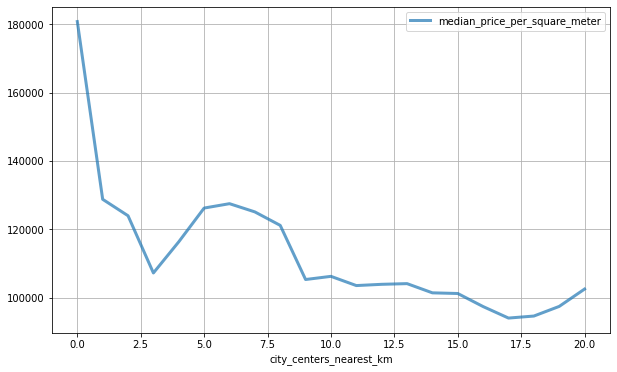

In [107]:
spb_pivot.plot(y = 'median_price_per_square_meter',x = 'city_centers_nearest_km',linewidth = 3,grid = True,alpha = 0.7,figsize = (10,6)) 

<AxesSubplot:xlabel='city_centers_nearest_km'>

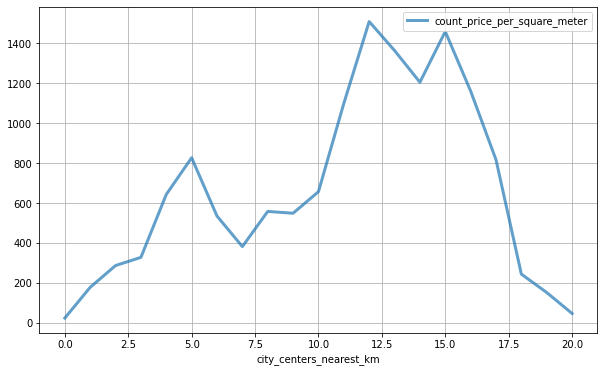

In [108]:
spb_pivot.plot(y = 'count_price_per_square_meter',x = 'city_centers_nearest_km',linewidth = 3,grid = True,alpha = 0.7,figsize = (10,6)) 

<b>зависимость цены за квадрат от расстояния до центра </b>
<br>из графика видно что самые дорогие квартиры находятся на расстояние до 1км и от 4 до 8 км , по поводу дороговизны около центра я могу понять , но вот что происходит между 4 и 8 км не знаю, могу предположить что данное расстояние попадает под элитное жильё + мы видим что в этих зонах жилья меньше 

<b>вывод:</b>
<br>основная информация с которой мы работали это last_price и price_per_square_meter , также предобработали и использовали столбцы first_day_exposition total_area ceiling_height living_area kitchen_area locality_name airports_nearest  и city_centers_nearest.<br><br>
также добавили и использовали столбцы in_the_town type_of_locality price_per_square_meter day_of_the_week year floor_type city_centers_nearest_km type_of_housing month<br><br>
в общем виде сильнее всего влияет на цену квартиры размер(количество квадратных метров,количество комнат) , расположение(тип поселения,удалённость от центра) , тип этажа(первый этаж является удешевляющим фактором)также есть локальные факторы увеличивающие стоимости квартир (например элитный район или близость к метро),но мы их не рассматривали <br><br>
портрет дорогой квартиры: недалеко от центра с максимальной площадью не на первом этаже<br>
портрет дешёвой квартиры: далеко от центра с минимальной площадью на первом этаже <br><br>
рекомендация для заказчика: полезным было бы ещё собирать информацию о расстояние до метро , а также собрать информацию о ещё какой-нибудь точки отно

все поправки внесены 